# Capstone Project 2: Model building

We have cleaned the data. Now it is the time to build models.

We will test different modeling methods and compare them.

The dataset is download from Kaggle. It is about house price. The goal will be use this dataset and build a predictive model for house pricing.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## The objective 
The objective of this project would be building a predictive model for house pricing. The result can be used to negotiate house price.
The modeling method can be logistic regression, random forest, gradient boosting, and SVM...
And compare them and pick the best performance one for prediction

In [1]:
#!pip install xgboost

### STEP1: Load the tools

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost
#from xgboost import XBGRegressor
from sklearn.linear_model import ElasticNet
import lightgbm as lgb
from catboost import CatBoostRegressor
from bayes_opt import BayesianOptimization


import time

import pickle

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### STEP2: Load the dataset

In [3]:
# load the data for training validate and the model
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [4]:
X_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
0,0,0.265781,-0.299126,-1.103656,-0.622336,-0.993685,0.0,-0.052803,-0.106049,-0.296145,...,-0.279145,-0.471138,-0.597689,1.811559,-0.397146,-0.225018,-0.188437,-0.106049,-0.086427,-0.030457
1,1,-0.256525,-0.807530,0.942201,-0.802170,-0.993685,0.0,-0.052803,-0.106049,-0.296145,...,-0.279145,-0.471138,-0.597689,1.811559,-0.397146,-0.225018,-0.188437,-0.106049,-0.086427,-0.030457
2,2,0.894922,-0.594411,0.080019,-0.116550,0.163220,0.0,-0.052803,-0.106049,-0.296145,...,-0.279145,-0.471138,-0.597689,-0.552011,2.517963,-0.225018,-0.188437,-0.106049,-0.086427,-0.030457
3,3,-0.110121,-0.460891,-0.129438,-0.799361,0.229329,0.0,-0.052803,-0.106049,-0.296145,...,-0.279145,-0.471138,-0.597689,1.811559,-0.397146,-0.225018,-0.188437,-0.106049,-0.086427,-0.030457
4,4,2.901050,-0.833207,0.474577,2.131384,-0.134270,0.0,-0.052803,-0.106049,-0.296145,...,-0.279145,-0.471138,-0.597689,-0.552011,-0.397146,-0.225018,-0.188437,9.429563,-0.086427,-0.030457


In [5]:
X_train = X_train.drop(columns=['Unnamed: 0']).values
X_test = X_test.drop(columns=['Unnamed: 0']).values

In [6]:
y_train = y_train.drop(columns=['Unnamed: 0']).values
y_test = y_test.drop(columns=['Unnamed: 0']).values

### STEP5: Modeling

In [7]:
### this dictionary will be used to save all the RMSE scores of using different regression method.
score = {}
Time = {}

#### 5.1 Linear Regression

In [8]:
t0 = time.time()
print(t0)

1624219015.6097853


In [9]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [10]:
t1 = time.time()
print(t1 - t0)

0.03800153732299805


In [11]:
y_pred = lreg.predict(X_test)
y_pred1 = y_pred[:, 0]

n = len(y_pred1)
for i in range(n):
    if y_pred1[i] < 0:
        y_pred1[i] = 5000
    if y_pred1[i] > 1000000:
        y_pred1[i] = 500000

In [12]:
R2 = r2_score(y_test, y_pred1)
MSE = mean_squared_error(y_test, y_pred1, squared=True)
RMSE = mean_squared_error(y_test, y_pred1, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.802266239548506
MSE score is 1485421393.535771
RMSE score is 38541.164921882824


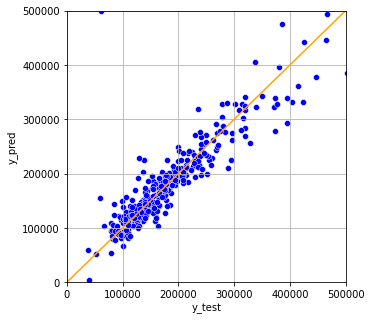

In [13]:
plt.figure(figsize=(5, 5))
sns.scatterplot(y_test[:, 0], y_pred[:, 0], color = 'blue');
plt.plot([0, 500000], [0, 500000], color = 'orange')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.xlim(0, 500000)
plt.ylim(0, 500000)
plt.grid()

In [14]:
score['LinearReg'] = RMSE
print (score)

Time['LinearReg'] = t1 - t0
print (Time)

{'LinearReg': 38541.164921882824}
{'LinearReg': 0.03800153732299805}


#### 5.2 Ridge regression

##### For the Ridge method, alpha is a parameter needed to be tuned. I am using the GridSearch method to find the best alpha for this modeling

In [15]:
t0 = time.time()
print(t0)

1624219015.9117854


In [16]:
rr = Ridge()
param = {'alpha': [8, 10, 15]}
rr_cv = GridSearchCV(rr, param, cv=5)
rr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [8, 10, 15]})

In [17]:
t1 = time.time()
print(t1 - t0)

0.06300210952758789


In [18]:
print("Best Score:" + str(rr_cv.best_score_))
print("Best Parameters: " + str(rr_cv.best_params_))

Best Score:0.8353573891943226
Best Parameters: {'alpha': 10}


In [19]:
y_pred = rr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8746139517082054
MSE score is 941928774.1165981
RMSE score is 30690.858152169647


In [20]:
score['ridge'] = RMSE
print (score)

Time['ridge'] = t1 - t0
print (Time)

{'LinearReg': 38541.164921882824, 'ridge': 30690.858152169647}
{'LinearReg': 0.03800153732299805, 'ridge': 0.06300210952758789}


#### 5.3 Lasso regression

In [21]:
t0 = time.time()
print(t0)

1624219016.0387864


In [22]:
lr = Lasso()
param = {'alpha': [50, 100, 200]}  #{'alpha': [600]}     
lr_cv = GridSearchCV(lr, param, cv=5)
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [50, 100, 200]})

In [23]:
t1 = time.time()
print(t1 - t0)

0.12499523162841797


##### I tuned the alpha parameter to get the best socre.

In [24]:
print("Best Score:" + str(lr_cv.best_score_))
print("Best Parameters: " + str(lr_cv.best_params_))

Best Score:0.8353066517323754
Best Parameters: {'alpha': 100}


In [25]:
y_pred = lr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8747088765720505
MSE score is 941215676.7516774
RMSE score is 30679.238529528033


In [26]:
score['lasso'] = RMSE
print (score)

Time['lasso'] = t1 - t0
print (Time)

{'LinearReg': 38541.164921882824, 'ridge': 30690.858152169647, 'lasso': 30679.238529528033}
{'LinearReg': 0.03800153732299805, 'ridge': 0.06300210952758789, 'lasso': 0.12499523162841797}


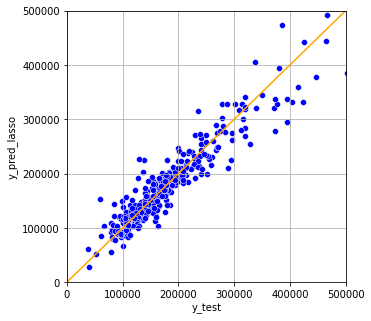

In [27]:
plt.figure(figsize=(5, 5))
sns.scatterplot(y_test[:, 0], y_pred, color = 'blue');
plt.plot([0, 500000], [0, 500000], color = 'orange')
plt.xlabel('y_test')
plt.ylabel('y_pred_lasso')
plt.xlim(0, 500000)
plt.ylim(0, 500000)
plt.grid()

#### From the above plot, we can see the prediction results is pretty good. 

#### 5.4 ElasticNet

In [28]:
t0 = time.time()
print(t0)

1624219016.3527837


In [29]:
en = ElasticNet()
params = {'alpha': [50, 100, 200], 'l1_ratio': [0.8, 1, 1.2]}   #{'alpha': [650, 700, 750], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
en_cv = GridSearchCV(en, params, cv=5)
en_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [50, 100, 200], 'l1_ratio': [0.8, 1, 1.2]})

In [30]:
t1 = time.time()
print(t1 - t0)

1.063910961151123


In [31]:
print("Best Score:" + str(en_cv.best_score_))
print("Best Parameters: " + str(en_cv.best_params_))

Best Score:0.8353066517323754
Best Parameters: {'alpha': 100, 'l1_ratio': 1}


###### The best l1_ratio is 1. So l2 norm is used for the penalty term. I guess it should be similar as Ridge method. 

In [32]:
y_pred = en_cv.predict(X_test)
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8747088765720505
MSE score is 941215676.7516774
RMSE score is 30679.238529528033


In [33]:
score['ElasticNet'] = RMSE
print (score)

Time['ElasticNet'] = t1 - t0
print (Time)

{'LinearReg': 38541.164921882824, 'ridge': 30690.858152169647, 'lasso': 30679.238529528033, 'ElasticNet': 30679.238529528033}
{'LinearReg': 0.03800153732299805, 'ridge': 0.06300210952758789, 'lasso': 0.12499523162841797, 'ElasticNet': 1.063910961151123}


#### 5.5 SVR

In [34]:
t0 = time.time()
print(t0)

1624219017.4756823


In [35]:
svr = SVR()
params = {'C': [450000, 500000, 550000], 'epsilon': [600, 700, 800]}  #{'C': 200000+50000*(1+np.arange(10)), 'epsilon': 200*(1+np.arange(10))}
svr_cv = GridSearchCV(svr, params, cv=5)
svr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [450000, 500000, 550000],
                         'epsilon': [600, 700, 800]})

In [36]:
t1 = time.time()
print(t1 - t0)

4.51299786567688


In [37]:
print("Best Score:" + str(svr_cv.best_score_))
print("Best Parameters: " + str(svr_cv.best_params_))

Best Score:0.7657865174882053
Best Parameters: {'C': 500000, 'epsilon': 700}


In [38]:
y_pred = svr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8371112000200889
MSE score is 1223658052.6514776
RMSE score is 34980.82407050294


In [39]:
score['svr'] = RMSE
print (score)

Time['svr'] = t1 - t0
print (Time)

{'LinearReg': 38541.164921882824, 'ridge': 30690.858152169647, 'lasso': 30679.238529528033, 'ElasticNet': 30679.238529528033, 'svr': 34980.82407050294}
{'LinearReg': 0.03800153732299805, 'ridge': 0.06300210952758789, 'lasso': 0.12499523162841797, 'ElasticNet': 1.063910961151123, 'svr': 4.51299786567688}


#### 5.6 Random Forest

In [40]:
t0 = time.time()
print(t0)

1624219022.06868


In [41]:
rfr = RandomForestRegressor()
params = {'n_estimators': [650, 680, 750]} #{'n_estimators': 650+ 10*(1+np.arange(10))}
rfr_cv = GridSearchCV(rfr, params, cv=5)
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [650, 680, 750]})

In [42]:
t1 = time.time()
print(t1 - t0)

39.26423239707947


In [43]:
print("Best Score:" + str(rfr_cv.best_score_))
print("Best Parameters: " + str(rfr_cv.best_params_))

Best Score:0.8259585734398337
Best Parameters: {'n_estimators': 750}


In [44]:
y_pred = rfr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8720609517774922
MSE score is 961107495.5757853
RMSE score is 31001.733751127296


In [45]:
score['random_forest'] = RMSE
print (score)

Time['random_forest'] = t1 - t0
print (Time)

{'LinearReg': 38541.164921882824, 'ridge': 30690.858152169647, 'lasso': 30679.238529528033, 'ElasticNet': 30679.238529528033, 'svr': 34980.82407050294, 'random_forest': 31001.733751127296}
{'LinearReg': 0.03800153732299805, 'ridge': 0.06300210952758789, 'lasso': 0.12499523162841797, 'ElasticNet': 1.063910961151123, 'svr': 4.51299786567688, 'random_forest': 39.26423239707947}


#### 5.7 XGBoost

In [46]:
t0 = time.time()
print(t0)

1624219061.456915


In [47]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [10, 20, 50, 100],
        'objective': ['reg:squarederror']
    }
    
    xgb_model = xgboost.XGBRegressor()
    
    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
    
    gsearch.fit(X_train, y_train)
    
    return gsearch.best_params_ 

#####################################################################################
#Run only in the first run of the kernel.
# hyperParameterTuning(X_train, y_train)

#### Best fit model

In [48]:
xgb_model = xgboost.XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 5,
        min_child_weight = 1,
        n_estimators = 100,
        subsample = 0.7)

%time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

Wall time: 74.6 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred = xgb_model.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8900850740874824
MSE score is 825706151.7798047
RMSE score is 28735.103128052364


In [50]:
score['xgboost'] = RMSE
print (score)

Time['xgboost'] = t1 - t0
print (Time)

{'LinearReg': 38541.164921882824, 'ridge': 30690.858152169647, 'lasso': 30679.238529528033, 'ElasticNet': 30679.238529528033, 'svr': 34980.82407050294, 'random_forest': 31001.733751127296, 'xgboost': 28735.103128052364}
{'LinearReg': 0.03800153732299805, 'ridge': 0.06300210952758789, 'lasso': 0.12499523162841797, 'ElasticNet': 1.063910961151123, 'svr': 4.51299786567688, 'random_forest': 39.26423239707947, 'xgboost': -0.12400245666503906}


#### 5.8 XGboost_dmatrix

##### Next we are goign to test another way of using XGBoost. Firstly we need to convert the data to dmatrix by xgboost.DMatrix

In [51]:
# convert the train and test data to dmatrix
train_dmatrix = xgboost.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgboost.DMatrix(data=X_test, label=y_test)

#param = {'booster': 'gblinear', 'objective': 'reg:linear'}
param = {'objective': 'reg:squarederror',
        'booster': 'gblinear'}

xg_score=[]
for i in range(1, 10):
    xgb_r = xgboost.train(params=param, dtrain=train_dmatrix, num_boost_round=i)
    y_pred = xgb_r.predict(test_dmatrix)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    xg_score.append(RMSE)    
    
print(xg_score)
    
#print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

[100489.2339763215, 57424.229450890816, 38658.992793290556, 32639.91744211405, 30865.182984986513, 30428.182066183417, 30303.972182957, 30297.57578094325, 30310.12962975383]


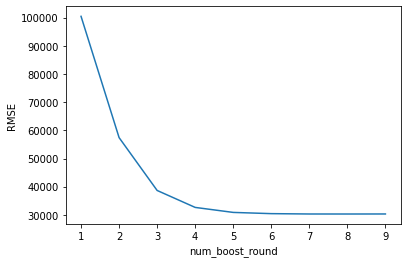

In [52]:
plt.plot(np.arange(1, 10), xg_score)
plt.xlabel('num_boost_round')
plt.ylabel('RMSE')
plt.show()

The best 'num_boost_round' is 5

In [53]:
xgb_r = xgboost.train(params=param, dtrain=train_dmatrix, num_boost_round=6)
y_pred = xgb_r.predict(test_dmatrix)
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8740347972722855
MSE score is 946279515.1701865
RMSE score is 30761.656573893848


In [54]:
#score['xgboost_dmatrix'] = RMSE
#print (score)

#Time['xgboost_dmatrix'] = t1 - t0
#print (Time)

#### 5.9 LightGBM

In [55]:
#LightGBM hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [5, 10, 15],
        'num_leaves': [32, 48],
        'max_bin': [512],
        'task': ['train'], 
        'boosting_type': ['gbdt'],
        'objective': ['regression'],
        'metric': ['l2', 'auc'],
        'bagging_freq':[10], 
        'bagging_fraction': [0.7],
        'feature_fraction': [0.8],
        'num_iterations': [100000], 
        'n_estimators': [1000]
    }
    
    lgb_model = lgb.LGBMRegressor()
    
    gsearch = GridSearchCV(estimator = lgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
    
    gsearch.fit(X_train, y_train)
    
    return gsearch.best_params_ 

#####################################################################################
#Run only in the first run of the kernel.
#hyperParameterTuning(X_train, y_train)

#### Best fit model

In [56]:
t0 = time.time()
print(t0)

1624219061.8514001


In [57]:
lgb_model = lgb.LGBMRegressor(learning_rate = 0.01,
                              max_depth = 15,
                              num_leaves =32,
                              max_bin = 512,
                              task = 'train',
                              boosting_type = 'gbdt',
                              objective = 'regression',
                              metric = 'l2',
                              bagging_freq = 10,
                              bagging_fraction = 0.7,
                              feature_fraction = 0.8,
                              num_iterations = 100000,
                              n_estimators = 1000)

%time lgb_model.fit(X_train, y_train, early_stopping_rounds=1000, eval_set=[(X_test, y_test)], verbose=False)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
Wall time: 2.12 s


LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.8,
              learning_rate=0.01, max_bin=512, max_depth=15, metric='l2',
              n_estimators=1000, num_iterations=100000, num_leaves=32,
              objective='regression', task='train')

gbm = lgb.LGBMRegressor(**params1)
gbm_cv = GridSearchCV(gbm, params, cv=5)
gbm_cv.fit(X_train, y_train, 
       eval_set=[(X_test, y_test)],
       eval_metric='l1',
       early_stopping_rounds=1000)

In [58]:
t1 = time.time()
print(t1 - t0)

2.153000831604004


In [59]:
y_pred = lgb_model.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8789486504914168
MSE score is 909365521.9313697
RMSE score is 30155.688052693637


In [60]:
score['lightgbm'] = RMSE
print (score)

Time['lightgbm'] = t1 - t0
print (Time)

{'LinearReg': 38541.164921882824, 'ridge': 30690.858152169647, 'lasso': 30679.238529528033, 'ElasticNet': 30679.238529528033, 'svr': 34980.82407050294, 'random_forest': 31001.733751127296, 'xgboost': 28735.103128052364, 'lightgbm': 30155.688052693637}
{'LinearReg': 0.03800153732299805, 'ridge': 0.06300210952758789, 'lasso': 0.12499523162841797, 'ElasticNet': 1.063910961151123, 'svr': 4.51299786567688, 'random_forest': 39.26423239707947, 'xgboost': -0.12400245666503906, 'lightgbm': 2.153000831604004}


#### 5.10 Catboost

In [61]:
t0 = time.time()
print(t0)

1624219064.066401


In [62]:
cb = CatBoostRegressor(iterations=3000, depth=5)
params =  {'learning_rate': [0.01]} # {'learning_rate': [0.01, 0.05]}
cb_cv = GridSearchCV(cb, params, cv=5)
cb_cv.fit(X_train, y_train)

0:	learn: 77027.3104875	total: 162ms	remaining: 8m 5s
1:	learn: 76552.3608529	total: 163ms	remaining: 4m 3s
2:	learn: 76111.4599135	total: 163ms	remaining: 2m 43s
3:	learn: 75674.0423108	total: 164ms	remaining: 2m 3s
4:	learn: 75200.1011949	total: 165ms	remaining: 1m 38s
5:	learn: 74736.4479701	total: 166ms	remaining: 1m 22s
6:	learn: 74271.5271570	total: 167ms	remaining: 1m 11s
7:	learn: 73844.5168491	total: 168ms	remaining: 1m 2s
8:	learn: 73395.7513112	total: 169ms	remaining: 56.2s
9:	learn: 72973.4884998	total: 170ms	remaining: 50.9s
10:	learn: 72534.6059384	total: 171ms	remaining: 46.5s
11:	learn: 72083.6595214	total: 172ms	remaining: 42.8s
12:	learn: 71707.8103287	total: 173ms	remaining: 39.8s
13:	learn: 71324.9242718	total: 174ms	remaining: 37.2s
14:	learn: 70893.8824344	total: 175ms	remaining: 34.9s
15:	learn: 70467.8373407	total: 176ms	remaining: 32.9s
16:	learn: 70068.9872013	total: 177ms	remaining: 31.1s
17:	learn: 69695.1052775	total: 178ms	remaining: 29.5s
18:	learn: 69308

176:	learn: 37258.4449060	total: 318ms	remaining: 5.08s
177:	learn: 37169.0458377	total: 319ms	remaining: 5.06s
178:	learn: 37082.7916076	total: 320ms	remaining: 5.05s
179:	learn: 37001.1329706	total: 321ms	remaining: 5.03s
180:	learn: 36929.9923323	total: 322ms	remaining: 5.01s
181:	learn: 36817.7964086	total: 323ms	remaining: 5s
182:	learn: 36727.1684199	total: 324ms	remaining: 4.98s
183:	learn: 36631.4579224	total: 325ms	remaining: 4.97s
184:	learn: 36537.6178988	total: 326ms	remaining: 4.96s
185:	learn: 36436.0517788	total: 326ms	remaining: 4.94s
186:	learn: 36343.6190677	total: 327ms	remaining: 4.92s
187:	learn: 36251.3530109	total: 328ms	remaining: 4.91s
188:	learn: 36156.7759442	total: 329ms	remaining: 4.89s
189:	learn: 36080.9310180	total: 330ms	remaining: 4.88s
190:	learn: 35991.4506242	total: 331ms	remaining: 4.87s
191:	learn: 35911.2396173	total: 332ms	remaining: 4.85s
192:	learn: 35827.3705749	total: 333ms	remaining: 4.84s
193:	learn: 35754.6371992	total: 333ms	remaining: 4

352:	learn: 28574.6056361	total: 474ms	remaining: 3.55s
353:	learn: 28549.5645385	total: 474ms	remaining: 3.55s
354:	learn: 28527.9974122	total: 475ms	remaining: 3.54s
355:	learn: 28500.5927725	total: 476ms	remaining: 3.54s
356:	learn: 28469.2049157	total: 477ms	remaining: 3.53s
357:	learn: 28448.2690409	total: 478ms	remaining: 3.53s
358:	learn: 28422.0077060	total: 479ms	remaining: 3.52s
359:	learn: 28387.7365288	total: 480ms	remaining: 3.52s
360:	learn: 28364.1540070	total: 481ms	remaining: 3.51s
361:	learn: 28346.1982997	total: 482ms	remaining: 3.51s
362:	learn: 28324.2421754	total: 482ms	remaining: 3.5s
363:	learn: 28295.9232519	total: 483ms	remaining: 3.5s
364:	learn: 28273.8044209	total: 484ms	remaining: 3.5s
365:	learn: 28252.1429321	total: 485ms	remaining: 3.49s
366:	learn: 28235.6475197	total: 486ms	remaining: 3.49s
367:	learn: 28212.8196557	total: 487ms	remaining: 3.48s
368:	learn: 28191.6064736	total: 488ms	remaining: 3.48s
369:	learn: 28172.5613950	total: 489ms	remaining: 3

522:	learn: 25759.0977667	total: 629ms	remaining: 2.98s
523:	learn: 25749.2359108	total: 629ms	remaining: 2.97s
524:	learn: 25739.4209686	total: 631ms	remaining: 2.97s
525:	learn: 25730.3066812	total: 631ms	remaining: 2.97s
526:	learn: 25717.7129967	total: 632ms	remaining: 2.97s
527:	learn: 25707.8451051	total: 633ms	remaining: 2.96s
528:	learn: 25697.7304727	total: 634ms	remaining: 2.96s
529:	learn: 25687.2665700	total: 635ms	remaining: 2.96s
530:	learn: 25676.2433290	total: 636ms	remaining: 2.96s
531:	learn: 25667.0705466	total: 637ms	remaining: 2.95s
532:	learn: 25660.9161965	total: 638ms	remaining: 2.95s
533:	learn: 25649.1509293	total: 639ms	remaining: 2.95s
534:	learn: 25641.0181494	total: 640ms	remaining: 2.95s
535:	learn: 25631.0436326	total: 641ms	remaining: 2.94s
536:	learn: 25619.8641199	total: 642ms	remaining: 2.94s
537:	learn: 25612.4093123	total: 642ms	remaining: 2.94s
538:	learn: 25596.7239196	total: 643ms	remaining: 2.94s
539:	learn: 25584.1833996	total: 644ms	remaining

686:	learn: 24226.6313290	total: 783ms	remaining: 2.63s
687:	learn: 24219.9822079	total: 784ms	remaining: 2.63s
688:	learn: 24209.2599144	total: 785ms	remaining: 2.63s
689:	learn: 24202.6188346	total: 786ms	remaining: 2.63s
690:	learn: 24191.5902575	total: 787ms	remaining: 2.63s
691:	learn: 24179.6421097	total: 788ms	remaining: 2.63s
692:	learn: 24170.0963006	total: 789ms	remaining: 2.63s
693:	learn: 24162.0136496	total: 790ms	remaining: 2.63s
694:	learn: 24154.3579671	total: 791ms	remaining: 2.62s
695:	learn: 24148.7792554	total: 792ms	remaining: 2.62s
696:	learn: 24143.8781574	total: 793ms	remaining: 2.62s
697:	learn: 24135.7677754	total: 794ms	remaining: 2.62s
698:	learn: 24129.4061136	total: 795ms	remaining: 2.62s
699:	learn: 24120.3642682	total: 796ms	remaining: 2.62s
700:	learn: 24107.9566240	total: 797ms	remaining: 2.61s
701:	learn: 24101.9895006	total: 798ms	remaining: 2.61s
702:	learn: 24093.6257995	total: 799ms	remaining: 2.61s
703:	learn: 24087.5962322	total: 800ms	remaining

843:	learn: 23157.4574143	total: 937ms	remaining: 2.39s
844:	learn: 23145.9774074	total: 939ms	remaining: 2.39s
845:	learn: 23140.7992143	total: 940ms	remaining: 2.39s
846:	learn: 23137.0885691	total: 941ms	remaining: 2.39s
847:	learn: 23130.6207999	total: 942ms	remaining: 2.39s
848:	learn: 23126.5139330	total: 943ms	remaining: 2.39s
849:	learn: 23118.7135614	total: 944ms	remaining: 2.39s
850:	learn: 23112.3838819	total: 946ms	remaining: 2.39s
851:	learn: 23106.8644692	total: 947ms	remaining: 2.39s
852:	learn: 23100.4962543	total: 948ms	remaining: 2.39s
853:	learn: 23094.5141966	total: 949ms	remaining: 2.38s
854:	learn: 23088.0643535	total: 950ms	remaining: 2.38s
855:	learn: 23081.2795829	total: 952ms	remaining: 2.38s
856:	learn: 23071.1583993	total: 953ms	remaining: 2.38s
857:	learn: 23067.8321096	total: 954ms	remaining: 2.38s
858:	learn: 23061.8126104	total: 955ms	remaining: 2.38s
859:	learn: 23055.6807171	total: 956ms	remaining: 2.38s
860:	learn: 23049.9495646	total: 957ms	remaining

1065:	learn: 21664.7641554	total: 1.24s	remaining: 2.26s
1066:	learn: 21659.7138776	total: 1.25s	remaining: 2.26s
1067:	learn: 21651.8702223	total: 1.25s	remaining: 2.26s
1068:	learn: 21647.0593658	total: 1.25s	remaining: 2.26s
1069:	learn: 21638.3736420	total: 1.25s	remaining: 2.26s
1070:	learn: 21634.0156455	total: 1.25s	remaining: 2.26s
1071:	learn: 21630.4568190	total: 1.26s	remaining: 2.26s
1072:	learn: 21622.8680257	total: 1.26s	remaining: 2.26s
1073:	learn: 21616.7397466	total: 1.26s	remaining: 2.26s
1074:	learn: 21613.3126043	total: 1.26s	remaining: 2.26s
1075:	learn: 21607.0324687	total: 1.27s	remaining: 2.26s
1076:	learn: 21602.2246297	total: 1.27s	remaining: 2.27s
1077:	learn: 21596.1080065	total: 1.27s	remaining: 2.27s
1078:	learn: 21594.3841507	total: 1.27s	remaining: 2.27s
1079:	learn: 21588.7597425	total: 1.28s	remaining: 2.27s
1080:	learn: 21585.3094220	total: 1.28s	remaining: 2.27s
1081:	learn: 21578.3272939	total: 1.28s	remaining: 2.27s
1082:	learn: 21572.3238456	tota

1285:	learn: 20338.4022942	total: 1.55s	remaining: 2.07s
1286:	learn: 20333.7025925	total: 1.55s	remaining: 2.07s
1287:	learn: 20324.5073743	total: 1.55s	remaining: 2.07s
1288:	learn: 20316.5996350	total: 1.56s	remaining: 2.07s
1289:	learn: 20313.1138660	total: 1.56s	remaining: 2.06s
1290:	learn: 20304.8157225	total: 1.56s	remaining: 2.06s
1291:	learn: 20300.7137875	total: 1.56s	remaining: 2.06s
1292:	learn: 20293.1233455	total: 1.56s	remaining: 2.06s
1293:	learn: 20284.5928931	total: 1.56s	remaining: 2.06s
1294:	learn: 20280.4965467	total: 1.56s	remaining: 2.06s
1295:	learn: 20271.3188016	total: 1.56s	remaining: 2.06s
1296:	learn: 20261.4350323	total: 1.56s	remaining: 2.05s
1297:	learn: 20256.6857500	total: 1.56s	remaining: 2.05s
1298:	learn: 20251.1455151	total: 1.57s	remaining: 2.05s
1299:	learn: 20248.3153112	total: 1.57s	remaining: 2.05s
1300:	learn: 20243.7295783	total: 1.57s	remaining: 2.05s
1301:	learn: 20237.8174644	total: 1.57s	remaining: 2.05s
1302:	learn: 20233.5077963	tota

1450:	learn: 19497.3648387	total: 1.71s	remaining: 1.82s
1451:	learn: 19490.6844472	total: 1.71s	remaining: 1.82s
1452:	learn: 19483.1585641	total: 1.71s	remaining: 1.82s
1453:	learn: 19477.3209413	total: 1.71s	remaining: 1.82s
1454:	learn: 19472.6292032	total: 1.71s	remaining: 1.82s
1455:	learn: 19464.4566265	total: 1.71s	remaining: 1.82s
1456:	learn: 19460.6826408	total: 1.71s	remaining: 1.81s
1457:	learn: 19457.1444171	total: 1.72s	remaining: 1.81s
1458:	learn: 19452.4666972	total: 1.72s	remaining: 1.81s
1459:	learn: 19446.3768746	total: 1.72s	remaining: 1.81s
1460:	learn: 19444.7961207	total: 1.72s	remaining: 1.81s
1461:	learn: 19441.6107646	total: 1.72s	remaining: 1.81s
1462:	learn: 19436.1294068	total: 1.72s	remaining: 1.81s
1463:	learn: 19434.6709320	total: 1.72s	remaining: 1.81s
1464:	learn: 19430.7841741	total: 1.72s	remaining: 1.8s
1465:	learn: 19426.2304462	total: 1.72s	remaining: 1.8s
1466:	learn: 19419.2659854	total: 1.73s	remaining: 1.8s
1467:	learn: 19416.2813183	total: 

1614:	learn: 18806.1744113	total: 1.86s	remaining: 1.6s
1615:	learn: 18800.7869186	total: 1.86s	remaining: 1.6s
1616:	learn: 18796.9669817	total: 1.87s	remaining: 1.6s
1617:	learn: 18789.7287338	total: 1.87s	remaining: 1.59s
1618:	learn: 18786.6555201	total: 1.87s	remaining: 1.59s
1619:	learn: 18780.8614339	total: 1.87s	remaining: 1.59s
1620:	learn: 18778.0262461	total: 1.87s	remaining: 1.59s
1621:	learn: 18774.3498395	total: 1.87s	remaining: 1.59s
1622:	learn: 18767.2187243	total: 1.87s	remaining: 1.59s
1623:	learn: 18762.9358426	total: 1.87s	remaining: 1.59s
1624:	learn: 18757.9373232	total: 1.87s	remaining: 1.58s
1625:	learn: 18756.7160598	total: 1.87s	remaining: 1.58s
1626:	learn: 18751.7093911	total: 1.88s	remaining: 1.58s
1627:	learn: 18749.7033415	total: 1.88s	remaining: 1.58s
1628:	learn: 18748.9985452	total: 1.88s	remaining: 1.58s
1629:	learn: 18746.2697876	total: 1.88s	remaining: 1.58s
1630:	learn: 18742.8109810	total: 1.88s	remaining: 1.58s
1631:	learn: 18736.4370967	total: 

1784:	learn: 18091.8704681	total: 2.02s	remaining: 1.37s
1785:	learn: 18090.6508216	total: 2.02s	remaining: 1.37s
1786:	learn: 18090.3651106	total: 2.02s	remaining: 1.37s
1787:	learn: 18086.8787393	total: 2.02s	remaining: 1.37s
1788:	learn: 18082.4685829	total: 2.02s	remaining: 1.37s
1789:	learn: 18076.1167579	total: 2.02s	remaining: 1.37s
1790:	learn: 18073.2623143	total: 2.02s	remaining: 1.37s
1791:	learn: 18068.2182109	total: 2.03s	remaining: 1.37s
1792:	learn: 18062.2674918	total: 2.03s	remaining: 1.36s
1793:	learn: 18059.0459996	total: 2.03s	remaining: 1.36s
1794:	learn: 18055.3108064	total: 2.03s	remaining: 1.36s
1795:	learn: 18049.9885886	total: 2.03s	remaining: 1.36s
1796:	learn: 18048.4777027	total: 2.03s	remaining: 1.36s
1797:	learn: 18044.7005060	total: 2.03s	remaining: 1.36s
1798:	learn: 18041.2224301	total: 2.03s	remaining: 1.36s
1799:	learn: 18035.1085892	total: 2.04s	remaining: 1.36s
1800:	learn: 18032.2459157	total: 2.04s	remaining: 1.35s
1801:	learn: 18031.8786142	tota

1934:	learn: 17574.4920971	total: 2.17s	remaining: 1.2s
1935:	learn: 17571.2727384	total: 2.18s	remaining: 1.2s
1936:	learn: 17569.1678768	total: 2.18s	remaining: 1.19s
1937:	learn: 17564.9466929	total: 2.18s	remaining: 1.19s
1938:	learn: 17563.0351875	total: 2.18s	remaining: 1.19s
1939:	learn: 17559.8107243	total: 2.18s	remaining: 1.19s
1940:	learn: 17556.3349943	total: 2.18s	remaining: 1.19s
1941:	learn: 17554.5677620	total: 2.18s	remaining: 1.19s
1942:	learn: 17553.1436268	total: 2.18s	remaining: 1.19s
1943:	learn: 17545.5837511	total: 2.18s	remaining: 1.19s
1944:	learn: 17542.3697835	total: 2.18s	remaining: 1.18s
1945:	learn: 17539.3068571	total: 2.19s	remaining: 1.18s
1946:	learn: 17537.8453964	total: 2.19s	remaining: 1.18s
1947:	learn: 17535.5333727	total: 2.19s	remaining: 1.18s
1948:	learn: 17534.8728389	total: 2.19s	remaining: 1.18s
1949:	learn: 17532.8439588	total: 2.19s	remaining: 1.18s
1950:	learn: 17528.7611627	total: 2.19s	remaining: 1.18s
1951:	learn: 17522.4775664	total:

2106:	learn: 17044.6268263	total: 2.33s	remaining: 988ms
2107:	learn: 17043.5165456	total: 2.33s	remaining: 987ms
2108:	learn: 17040.9198939	total: 2.33s	remaining: 986ms
2109:	learn: 17039.5723622	total: 2.33s	remaining: 984ms
2110:	learn: 17037.8209807	total: 2.33s	remaining: 983ms
2111:	learn: 17033.2424200	total: 2.33s	remaining: 982ms
2112:	learn: 17029.9597867	total: 2.34s	remaining: 981ms
2113:	learn: 17029.5210749	total: 2.34s	remaining: 980ms
2114:	learn: 17027.0654306	total: 2.34s	remaining: 979ms
2115:	learn: 17023.8664728	total: 2.34s	remaining: 978ms
2116:	learn: 17023.6429249	total: 2.34s	remaining: 976ms
2117:	learn: 17020.2881071	total: 2.34s	remaining: 975ms
2118:	learn: 17018.5383723	total: 2.34s	remaining: 974ms
2119:	learn: 17014.5509732	total: 2.34s	remaining: 973ms
2120:	learn: 17011.4893716	total: 2.34s	remaining: 972ms
2121:	learn: 17008.5569519	total: 2.35s	remaining: 971ms
2122:	learn: 17007.2945239	total: 2.35s	remaining: 969ms
2123:	learn: 17005.2659061	tota

2274:	learn: 16599.3388804	total: 2.49s	remaining: 793ms
2275:	learn: 16598.9570319	total: 2.49s	remaining: 791ms
2276:	learn: 16594.6051640	total: 2.49s	remaining: 790ms
2277:	learn: 16590.8499281	total: 2.49s	remaining: 789ms
2278:	learn: 16586.8254840	total: 2.49s	remaining: 788ms
2279:	learn: 16582.5807920	total: 2.49s	remaining: 787ms
2280:	learn: 16580.3129079	total: 2.49s	remaining: 786ms
2281:	learn: 16576.3826624	total: 2.49s	remaining: 785ms
2282:	learn: 16574.8836343	total: 2.49s	remaining: 783ms
2283:	learn: 16572.2405521	total: 2.5s	remaining: 782ms
2284:	learn: 16570.4573636	total: 2.5s	remaining: 781ms
2285:	learn: 16566.1504667	total: 2.5s	remaining: 780ms
2286:	learn: 16561.4884519	total: 2.5s	remaining: 779ms
2287:	learn: 16559.4884645	total: 2.5s	remaining: 778ms
2288:	learn: 16556.3409069	total: 2.5s	remaining: 777ms
2289:	learn: 16551.9477661	total: 2.5s	remaining: 775ms
2290:	learn: 16548.9650065	total: 2.5s	remaining: 774ms
2291:	learn: 16543.5138971	total: 2.5s	

2446:	learn: 16156.9246253	total: 2.64s	remaining: 597ms
2447:	learn: 16153.3893691	total: 2.64s	remaining: 596ms
2448:	learn: 16151.6973962	total: 2.64s	remaining: 595ms
2449:	learn: 16149.5367241	total: 2.64s	remaining: 594ms
2450:	learn: 16147.6121823	total: 2.65s	remaining: 593ms
2451:	learn: 16146.6197592	total: 2.65s	remaining: 591ms
2452:	learn: 16143.1986318	total: 2.65s	remaining: 590ms
2453:	learn: 16142.1893615	total: 2.65s	remaining: 589ms
2454:	learn: 16138.4743725	total: 2.65s	remaining: 588ms
2455:	learn: 16137.4384155	total: 2.65s	remaining: 587ms
2456:	learn: 16136.5251931	total: 2.65s	remaining: 586ms
2457:	learn: 16135.5595279	total: 2.65s	remaining: 585ms
2458:	learn: 16131.4488023	total: 2.65s	remaining: 584ms
2459:	learn: 16129.9016373	total: 2.65s	remaining: 583ms
2460:	learn: 16125.3015904	total: 2.65s	remaining: 581ms
2461:	learn: 16122.9193957	total: 2.65s	remaining: 580ms
2462:	learn: 16121.3464523	total: 2.66s	remaining: 579ms
2463:	learn: 16117.2082931	tota

2615:	learn: 15739.7339307	total: 2.8s	remaining: 411ms
2616:	learn: 15738.2355313	total: 2.8s	remaining: 410ms
2617:	learn: 15735.3981394	total: 2.8s	remaining: 409ms
2618:	learn: 15734.0047648	total: 2.8s	remaining: 408ms
2619:	learn: 15731.5394761	total: 2.8s	remaining: 407ms
2620:	learn: 15729.6319327	total: 2.8s	remaining: 405ms
2621:	learn: 15726.5787876	total: 2.8s	remaining: 404ms
2622:	learn: 15725.6559975	total: 2.81s	remaining: 403ms
2623:	learn: 15722.5207854	total: 2.81s	remaining: 402ms
2624:	learn: 15720.0259648	total: 2.81s	remaining: 401ms
2625:	learn: 15717.7870546	total: 2.81s	remaining: 400ms
2626:	learn: 15713.1169220	total: 2.81s	remaining: 399ms
2627:	learn: 15710.5637233	total: 2.81s	remaining: 398ms
2628:	learn: 15706.3264324	total: 2.81s	remaining: 397ms
2629:	learn: 15703.9555693	total: 2.81s	remaining: 396ms
2630:	learn: 15703.3689077	total: 2.81s	remaining: 395ms
2631:	learn: 15702.0749402	total: 2.81s	remaining: 394ms
2632:	learn: 15700.5789904	total: 2.82

2891:	learn: 15098.1248731	total: 3.1s	remaining: 116ms
2892:	learn: 15097.5548478	total: 3.1s	remaining: 115ms
2893:	learn: 15095.7113697	total: 3.11s	remaining: 114ms
2894:	learn: 15093.3558631	total: 3.11s	remaining: 113ms
2895:	learn: 15091.6408152	total: 3.11s	remaining: 112ms
2896:	learn: 15090.4021515	total: 3.11s	remaining: 111ms
2897:	learn: 15089.7522449	total: 3.11s	remaining: 109ms
2898:	learn: 15088.6874806	total: 3.11s	remaining: 108ms
2899:	learn: 15086.4266229	total: 3.11s	remaining: 107ms
2900:	learn: 15083.8096870	total: 3.11s	remaining: 106ms
2901:	learn: 15078.6579287	total: 3.11s	remaining: 105ms
2902:	learn: 15076.6978014	total: 3.12s	remaining: 104ms
2903:	learn: 15076.0259327	total: 3.12s	remaining: 103ms
2904:	learn: 15075.7549488	total: 3.12s	remaining: 102ms
2905:	learn: 15071.5645820	total: 3.12s	remaining: 101ms
2906:	learn: 15066.1510862	total: 3.12s	remaining: 99.8ms
2907:	learn: 15063.3313662	total: 3.12s	remaining: 98.7ms
2908:	learn: 15060.0822840	tota

121:	learn: 42927.8773800	total: 151ms	remaining: 3.56s
122:	learn: 42764.3515405	total: 152ms	remaining: 3.56s
123:	learn: 42610.0559980	total: 154ms	remaining: 3.56s
124:	learn: 42473.6106997	total: 155ms	remaining: 3.56s
125:	learn: 42342.2258458	total: 156ms	remaining: 3.56s
126:	learn: 42196.8868040	total: 157ms	remaining: 3.55s
127:	learn: 42063.3608090	total: 158ms	remaining: 3.56s
128:	learn: 41928.3253957	total: 160ms	remaining: 3.55s
129:	learn: 41776.3312614	total: 161ms	remaining: 3.55s
130:	learn: 41617.8885660	total: 162ms	remaining: 3.54s
131:	learn: 41480.5141654	total: 163ms	remaining: 3.54s
132:	learn: 41352.7097437	total: 164ms	remaining: 3.54s
133:	learn: 41225.9177276	total: 166ms	remaining: 3.54s
134:	learn: 41112.1685863	total: 167ms	remaining: 3.54s
135:	learn: 40971.5746530	total: 168ms	remaining: 3.54s
136:	learn: 40843.3585031	total: 169ms	remaining: 3.54s
137:	learn: 40719.1670099	total: 171ms	remaining: 3.54s
138:	learn: 40580.2103189	total: 172ms	remaining

319:	learn: 28679.1791642	total: 462ms	remaining: 3.87s
320:	learn: 28647.2669339	total: 464ms	remaining: 3.87s
321:	learn: 28609.6595738	total: 465ms	remaining: 3.87s
322:	learn: 28567.9096796	total: 467ms	remaining: 3.87s
323:	learn: 28540.8628741	total: 468ms	remaining: 3.87s
324:	learn: 28509.0174275	total: 470ms	remaining: 3.87s
325:	learn: 28473.1776536	total: 471ms	remaining: 3.86s
326:	learn: 28448.9648681	total: 473ms	remaining: 3.86s
327:	learn: 28420.1552144	total: 474ms	remaining: 3.86s
328:	learn: 28383.3505164	total: 475ms	remaining: 3.86s
329:	learn: 28352.5434957	total: 477ms	remaining: 3.86s
330:	learn: 28326.0036879	total: 478ms	remaining: 3.86s
331:	learn: 28296.1513447	total: 480ms	remaining: 3.85s
332:	learn: 28270.1952410	total: 481ms	remaining: 3.85s
333:	learn: 28237.7871743	total: 483ms	remaining: 3.85s
334:	learn: 28209.1423766	total: 484ms	remaining: 3.85s
335:	learn: 28171.4562414	total: 486ms	remaining: 3.85s
336:	learn: 28143.1881816	total: 488ms	remaining

591:	learn: 24039.2493036	total: 766ms	remaining: 3.12s
592:	learn: 24029.7416107	total: 767ms	remaining: 3.11s
593:	learn: 24020.0828730	total: 768ms	remaining: 3.11s
594:	learn: 24008.2559852	total: 770ms	remaining: 3.11s
595:	learn: 23997.0097097	total: 771ms	remaining: 3.11s
596:	learn: 23984.6676073	total: 773ms	remaining: 3.11s
597:	learn: 23975.6338847	total: 774ms	remaining: 3.11s
598:	learn: 23968.1956898	total: 775ms	remaining: 3.11s
599:	learn: 23955.7208777	total: 776ms	remaining: 3.1s
600:	learn: 23946.1047663	total: 777ms	remaining: 3.1s
601:	learn: 23935.4859398	total: 779ms	remaining: 3.1s
602:	learn: 23922.1896829	total: 780ms	remaining: 3.1s
603:	learn: 23914.2897284	total: 782ms	remaining: 3.1s
604:	learn: 23906.8322366	total: 783ms	remaining: 3.1s
605:	learn: 23892.6132114	total: 785ms	remaining: 3.1s
606:	learn: 23884.7741811	total: 786ms	remaining: 3.1s
607:	learn: 23867.0339175	total: 787ms	remaining: 3.1s
608:	learn: 23850.3076112	total: 788ms	remaining: 3.1s
60

854:	learn: 21871.3045997	total: 1.07s	remaining: 2.69s
855:	learn: 21866.3302344	total: 1.07s	remaining: 2.69s
856:	learn: 21863.2298749	total: 1.08s	remaining: 2.69s
857:	learn: 21858.2679848	total: 1.08s	remaining: 2.69s
858:	learn: 21853.2383345	total: 1.08s	remaining: 2.69s
859:	learn: 21849.2894900	total: 1.08s	remaining: 2.69s
860:	learn: 21841.4183488	total: 1.08s	remaining: 2.69s
861:	learn: 21837.1564308	total: 1.08s	remaining: 2.69s
862:	learn: 21832.9914474	total: 1.08s	remaining: 2.68s
863:	learn: 21826.7485491	total: 1.08s	remaining: 2.68s
864:	learn: 21818.7331033	total: 1.09s	remaining: 2.68s
865:	learn: 21811.9440622	total: 1.09s	remaining: 2.68s
866:	learn: 21806.9524158	total: 1.09s	remaining: 2.68s
867:	learn: 21803.8623279	total: 1.09s	remaining: 2.68s
868:	learn: 21793.8379512	total: 1.09s	remaining: 2.67s
869:	learn: 21783.3324878	total: 1.09s	remaining: 2.67s
870:	learn: 21775.5783009	total: 1.09s	remaining: 2.67s
871:	learn: 21767.4313304	total: 1.09s	remaining

1100:	learn: 20438.8208195	total: 1.38s	remaining: 2.38s
1101:	learn: 20427.6409333	total: 1.38s	remaining: 2.38s
1102:	learn: 20421.3610797	total: 1.38s	remaining: 2.38s
1103:	learn: 20414.5526319	total: 1.38s	remaining: 2.38s
1104:	learn: 20405.4329016	total: 1.39s	remaining: 2.38s
1105:	learn: 20396.4406265	total: 1.39s	remaining: 2.37s
1106:	learn: 20394.5613380	total: 1.39s	remaining: 2.37s
1107:	learn: 20389.9031985	total: 1.39s	remaining: 2.37s
1108:	learn: 20382.0660377	total: 1.39s	remaining: 2.37s
1109:	learn: 20376.3899951	total: 1.39s	remaining: 2.37s
1110:	learn: 20369.5164902	total: 1.39s	remaining: 2.37s
1111:	learn: 20360.6245004	total: 1.39s	remaining: 2.36s
1112:	learn: 20359.1376998	total: 1.39s	remaining: 2.36s
1113:	learn: 20357.6443238	total: 1.39s	remaining: 2.36s
1114:	learn: 20351.0759435	total: 1.4s	remaining: 2.36s
1115:	learn: 20347.9861935	total: 1.4s	remaining: 2.36s
1116:	learn: 20345.6316004	total: 1.4s	remaining: 2.36s
1117:	learn: 20335.3809031	total: 

1371:	learn: 19194.5590050	total: 1.69s	remaining: 2s
1372:	learn: 19189.8337235	total: 1.69s	remaining: 2s
1373:	learn: 19185.9728195	total: 1.69s	remaining: 2s
1374:	learn: 19183.3593667	total: 1.69s	remaining: 2s
1375:	learn: 19176.2747870	total: 1.69s	remaining: 2s
1376:	learn: 19167.4818352	total: 1.7s	remaining: 2s
1377:	learn: 19161.8665470	total: 1.7s	remaining: 2s
1378:	learn: 19155.7467580	total: 1.7s	remaining: 2s
1379:	learn: 19153.2062936	total: 1.7s	remaining: 1.99s
1380:	learn: 19150.6155795	total: 1.7s	remaining: 1.99s
1381:	learn: 19144.4999604	total: 1.7s	remaining: 1.99s
1382:	learn: 19140.8456569	total: 1.7s	remaining: 1.99s
1383:	learn: 19136.5108038	total: 1.7s	remaining: 1.99s
1384:	learn: 19131.2106250	total: 1.71s	remaining: 1.99s
1385:	learn: 19128.0833601	total: 1.71s	remaining: 1.99s
1386:	learn: 19123.2686819	total: 1.71s	remaining: 1.99s
1387:	learn: 19120.1831355	total: 1.71s	remaining: 1.98s
1388:	learn: 19111.5408754	total: 1.71s	remaining: 1.98s
1389:	

1646:	learn: 17969.1038327	total: 2s	remaining: 1.64s
1647:	learn: 17967.9122426	total: 2s	remaining: 1.64s
1648:	learn: 17966.3742976	total: 2s	remaining: 1.64s
1649:	learn: 17964.2590122	total: 2s	remaining: 1.64s
1650:	learn: 17959.8262265	total: 2s	remaining: 1.64s
1651:	learn: 17951.5122863	total: 2s	remaining: 1.63s
1652:	learn: 17948.8250500	total: 2s	remaining: 1.63s
1653:	learn: 17944.6291521	total: 2s	remaining: 1.63s
1654:	learn: 17941.3203129	total: 2s	remaining: 1.63s
1655:	learn: 17938.2844555	total: 2.01s	remaining: 1.63s
1656:	learn: 17934.0054457	total: 2.01s	remaining: 1.63s
1657:	learn: 17928.5647015	total: 2.01s	remaining: 1.63s
1658:	learn: 17927.0629007	total: 2.01s	remaining: 1.62s
1659:	learn: 17919.6733524	total: 2.01s	remaining: 1.62s
1660:	learn: 17915.6495662	total: 2.01s	remaining: 1.62s
1661:	learn: 17914.0281808	total: 2.01s	remaining: 1.62s
1662:	learn: 17908.7555298	total: 2.01s	remaining: 1.62s
1663:	learn: 17906.6726260	total: 2.01s	remaining: 1.62s
1

1854:	learn: 17176.1015273	total: 2.3s	remaining: 1.42s
1855:	learn: 17173.9190804	total: 2.3s	remaining: 1.42s
1856:	learn: 17169.9743308	total: 2.3s	remaining: 1.42s
1857:	learn: 17167.4448297	total: 2.3s	remaining: 1.42s
1858:	learn: 17164.0516359	total: 2.3s	remaining: 1.41s
1859:	learn: 17159.9479510	total: 2.31s	remaining: 1.41s
1860:	learn: 17158.4183703	total: 2.31s	remaining: 1.41s
1861:	learn: 17152.8150291	total: 2.31s	remaining: 1.41s
1862:	learn: 17147.3713923	total: 2.31s	remaining: 1.41s
1863:	learn: 17144.3246528	total: 2.31s	remaining: 1.41s
1864:	learn: 17140.7277285	total: 2.31s	remaining: 1.41s
1865:	learn: 17136.6189102	total: 2.31s	remaining: 1.41s
1866:	learn: 17135.0259916	total: 2.31s	remaining: 1.4s
1867:	learn: 17132.3206573	total: 2.31s	remaining: 1.4s
1868:	learn: 17129.4126791	total: 2.32s	remaining: 1.4s
1869:	learn: 17126.2108936	total: 2.32s	remaining: 1.4s
1870:	learn: 17121.9993399	total: 2.32s	remaining: 1.4s
1871:	learn: 17117.9776659	total: 2.32s	r

2131:	learn: 16325.5066372	total: 2.61s	remaining: 1.06s
2132:	learn: 16323.7647574	total: 2.61s	remaining: 1.06s
2133:	learn: 16318.8991044	total: 2.61s	remaining: 1.06s
2134:	learn: 16315.7380299	total: 2.61s	remaining: 1.06s
2135:	learn: 16312.3373052	total: 2.61s	remaining: 1.06s
2136:	learn: 16307.8804807	total: 2.61s	remaining: 1.05s
2137:	learn: 16305.9904916	total: 2.61s	remaining: 1.05s
2138:	learn: 16302.8337787	total: 2.61s	remaining: 1.05s
2139:	learn: 16300.3951326	total: 2.62s	remaining: 1.05s
2140:	learn: 16296.0192611	total: 2.62s	remaining: 1.05s
2141:	learn: 16293.6500931	total: 2.62s	remaining: 1.05s
2142:	learn: 16290.9864836	total: 2.62s	remaining: 1.05s
2143:	learn: 16286.8491551	total: 2.62s	remaining: 1.05s
2144:	learn: 16283.4374274	total: 2.62s	remaining: 1.04s
2145:	learn: 16279.1026669	total: 2.62s	remaining: 1.04s
2146:	learn: 16275.6382782	total: 2.62s	remaining: 1.04s
2147:	learn: 16274.0567643	total: 2.62s	remaining: 1.04s
2148:	learn: 16272.8721567	tota

2280:	learn: 15881.8823742	total: 2.76s	remaining: 871ms
2281:	learn: 15880.4774934	total: 2.76s	remaining: 869ms
2282:	learn: 15875.9442776	total: 2.76s	remaining: 868ms
2283:	learn: 15874.5396684	total: 2.77s	remaining: 867ms
2284:	learn: 15872.0263799	total: 2.77s	remaining: 866ms
2285:	learn: 15870.1760441	total: 2.77s	remaining: 865ms
2286:	learn: 15867.4912898	total: 2.77s	remaining: 863ms
2287:	learn: 15864.8668410	total: 2.77s	remaining: 862ms
2288:	learn: 15860.6156421	total: 2.77s	remaining: 861ms
2289:	learn: 15857.4289217	total: 2.77s	remaining: 860ms
2290:	learn: 15854.3036577	total: 2.77s	remaining: 859ms
2291:	learn: 15852.7670619	total: 2.77s	remaining: 857ms
2292:	learn: 15851.2414368	total: 2.78s	remaining: 856ms
2293:	learn: 15848.1110575	total: 2.78s	remaining: 855ms
2294:	learn: 15844.9547586	total: 2.78s	remaining: 854ms
2295:	learn: 15842.4824046	total: 2.78s	remaining: 853ms
2296:	learn: 15838.9323181	total: 2.78s	remaining: 852ms
2297:	learn: 15837.5660324	tota

2425:	learn: 15467.3204266	total: 2.92s	remaining: 690ms
2426:	learn: 15466.5218191	total: 2.92s	remaining: 689ms
2427:	learn: 15465.8719889	total: 2.92s	remaining: 688ms
2428:	learn: 15464.5077577	total: 2.92s	remaining: 687ms
2429:	learn: 15462.8935622	total: 2.92s	remaining: 685ms
2430:	learn: 15461.9827049	total: 2.92s	remaining: 684ms
2431:	learn: 15458.3068162	total: 2.92s	remaining: 683ms
2432:	learn: 15456.0126081	total: 2.92s	remaining: 682ms
2433:	learn: 15453.6521920	total: 2.92s	remaining: 680ms
2434:	learn: 15452.5360060	total: 2.93s	remaining: 679ms
2435:	learn: 15451.1019489	total: 2.93s	remaining: 678ms
2436:	learn: 15448.6299459	total: 2.93s	remaining: 677ms
2437:	learn: 15446.4868573	total: 2.93s	remaining: 675ms
2438:	learn: 15445.2529722	total: 2.93s	remaining: 674ms
2439:	learn: 15442.3657344	total: 2.93s	remaining: 673ms
2440:	learn: 15441.2839340	total: 2.93s	remaining: 672ms
2441:	learn: 15434.9483376	total: 2.93s	remaining: 670ms
2442:	learn: 15434.0068430	tota

2581:	learn: 15066.7874962	total: 3.07s	remaining: 498ms
2582:	learn: 15065.4894341	total: 3.08s	remaining: 497ms
2583:	learn: 15064.0506803	total: 3.08s	remaining: 495ms
2584:	learn: 15063.0888439	total: 3.08s	remaining: 494ms
2585:	learn: 15061.6276685	total: 3.08s	remaining: 493ms
2586:	learn: 15060.5178247	total: 3.08s	remaining: 492ms
2587:	learn: 15059.2232334	total: 3.08s	remaining: 490ms
2588:	learn: 15056.8863362	total: 3.08s	remaining: 489ms
2589:	learn: 15053.8749940	total: 3.08s	remaining: 488ms
2590:	learn: 15051.6268462	total: 3.08s	remaining: 487ms
2591:	learn: 15047.5528307	total: 3.08s	remaining: 486ms
2592:	learn: 15042.6596244	total: 3.08s	remaining: 484ms
2593:	learn: 15040.6542503	total: 3.09s	remaining: 483ms
2594:	learn: 15036.5268210	total: 3.09s	remaining: 482ms
2595:	learn: 15031.6285031	total: 3.09s	remaining: 481ms
2596:	learn: 15030.6000384	total: 3.09s	remaining: 479ms
2597:	learn: 15028.2490688	total: 3.09s	remaining: 478ms
2598:	learn: 15024.9574320	tota

2744:	learn: 14679.2211558	total: 3.23s	remaining: 300ms
2745:	learn: 14677.9630694	total: 3.23s	remaining: 299ms
2746:	learn: 14674.1965719	total: 3.23s	remaining: 298ms
2747:	learn: 14673.4120607	total: 3.23s	remaining: 297ms
2748:	learn: 14671.0196356	total: 3.23s	remaining: 295ms
2749:	learn: 14670.3933661	total: 3.24s	remaining: 294ms
2750:	learn: 14666.7158133	total: 3.24s	remaining: 293ms
2751:	learn: 14663.1551249	total: 3.24s	remaining: 292ms
2752:	learn: 14661.4067528	total: 3.24s	remaining: 291ms
2753:	learn: 14658.6193182	total: 3.24s	remaining: 289ms
2754:	learn: 14656.6138779	total: 3.24s	remaining: 288ms
2755:	learn: 14652.9521500	total: 3.24s	remaining: 287ms
2756:	learn: 14651.9602405	total: 3.24s	remaining: 286ms
2757:	learn: 14651.1596566	total: 3.24s	remaining: 285ms
2758:	learn: 14649.9371480	total: 3.25s	remaining: 283ms
2759:	learn: 14648.4242576	total: 3.25s	remaining: 282ms
2760:	learn: 14647.3055171	total: 3.25s	remaining: 281ms
2761:	learn: 14643.5623907	tota

2908:	learn: 14312.9080782	total: 3.39s	remaining: 106ms
2909:	learn: 14310.2704849	total: 3.39s	remaining: 105ms
2910:	learn: 14308.9444921	total: 3.39s	remaining: 104ms
2911:	learn: 14308.1531355	total: 3.39s	remaining: 102ms
2912:	learn: 14304.0575957	total: 3.39s	remaining: 101ms
2913:	learn: 14302.0906771	total: 3.39s	remaining: 100ms
2914:	learn: 14298.2551861	total: 3.39s	remaining: 99ms
2915:	learn: 14296.3732651	total: 3.39s	remaining: 97.8ms
2916:	learn: 14294.7666006	total: 3.4s	remaining: 96.6ms
2917:	learn: 14291.9453224	total: 3.4s	remaining: 95.5ms
2918:	learn: 14288.8975954	total: 3.4s	remaining: 94.3ms
2919:	learn: 14285.0885117	total: 3.4s	remaining: 93.1ms
2920:	learn: 14283.8871386	total: 3.4s	remaining: 91.9ms
2921:	learn: 14280.4739332	total: 3.4s	remaining: 90.8ms
2922:	learn: 14277.4783281	total: 3.4s	remaining: 89.6ms
2923:	learn: 14274.9732616	total: 3.4s	remaining: 88.4ms
2924:	learn: 14271.9145988	total: 3.4s	remaining: 87.3ms
2925:	learn: 14269.9070179	tota

126:	learn: 40252.3017548	total: 169ms	remaining: 3.83s
127:	learn: 40128.3195863	total: 170ms	remaining: 3.82s
128:	learn: 40017.4633504	total: 171ms	remaining: 3.82s
129:	learn: 39906.9058903	total: 173ms	remaining: 3.81s
130:	learn: 39795.4141194	total: 174ms	remaining: 3.8s
131:	learn: 39680.5533591	total: 175ms	remaining: 3.8s
132:	learn: 39553.9432728	total: 176ms	remaining: 3.79s
133:	learn: 39439.7153162	total: 177ms	remaining: 3.79s
134:	learn: 39319.7722453	total: 178ms	remaining: 3.79s
135:	learn: 39210.2333827	total: 179ms	remaining: 3.78s
136:	learn: 39074.7715549	total: 181ms	remaining: 3.77s
137:	learn: 38960.5654779	total: 182ms	remaining: 3.77s
138:	learn: 38866.2367457	total: 183ms	remaining: 3.76s
139:	learn: 38740.5341444	total: 184ms	remaining: 3.76s
140:	learn: 38633.6013320	total: 185ms	remaining: 3.75s
141:	learn: 38533.2139027	total: 186ms	remaining: 3.75s
142:	learn: 38417.3022237	total: 187ms	remaining: 3.74s
143:	learn: 38322.8584733	total: 189ms	remaining: 

277:	learn: 30016.2220214	total: 324ms	remaining: 3.18s
278:	learn: 29988.2209985	total: 325ms	remaining: 3.17s
279:	learn: 29946.9890175	total: 326ms	remaining: 3.17s
280:	learn: 29913.6493988	total: 327ms	remaining: 3.17s
281:	learn: 29882.2276731	total: 328ms	remaining: 3.17s
282:	learn: 29845.8091833	total: 329ms	remaining: 3.16s
283:	learn: 29810.7063769	total: 330ms	remaining: 3.16s
284:	learn: 29780.2858695	total: 331ms	remaining: 3.15s
285:	learn: 29750.4841451	total: 332ms	remaining: 3.15s
286:	learn: 29720.6534634	total: 333ms	remaining: 3.15s
287:	learn: 29684.5348965	total: 334ms	remaining: 3.15s
288:	learn: 29645.2257038	total: 335ms	remaining: 3.14s
289:	learn: 29610.7935076	total: 336ms	remaining: 3.14s
290:	learn: 29572.9585536	total: 337ms	remaining: 3.14s
291:	learn: 29544.5453824	total: 338ms	remaining: 3.13s
292:	learn: 29512.9850380	total: 339ms	remaining: 3.13s
293:	learn: 29475.8495398	total: 340ms	remaining: 3.13s
294:	learn: 29444.5084384	total: 341ms	remaining

434:	learn: 26514.4031127	total: 480ms	remaining: 2.83s
435:	learn: 26499.0507080	total: 481ms	remaining: 2.83s
436:	learn: 26482.1186439	total: 482ms	remaining: 2.82s
437:	learn: 26463.0146130	total: 483ms	remaining: 2.82s
438:	learn: 26458.3105911	total: 484ms	remaining: 2.82s
439:	learn: 26444.7435341	total: 485ms	remaining: 2.82s
440:	learn: 26436.5126765	total: 486ms	remaining: 2.82s
441:	learn: 26421.8458391	total: 487ms	remaining: 2.82s
442:	learn: 26409.7599620	total: 488ms	remaining: 2.82s
443:	learn: 26393.0800091	total: 489ms	remaining: 2.81s
444:	learn: 26374.4897143	total: 490ms	remaining: 2.81s
445:	learn: 26354.2797508	total: 491ms	remaining: 2.81s
446:	learn: 26342.9998129	total: 492ms	remaining: 2.81s
447:	learn: 26330.5990534	total: 493ms	remaining: 2.81s
448:	learn: 26316.6972058	total: 494ms	remaining: 2.81s
449:	learn: 26300.8449812	total: 495ms	remaining: 2.81s
450:	learn: 26290.3716229	total: 496ms	remaining: 2.8s
451:	learn: 26284.9057132	total: 497ms	remaining:

696:	learn: 24055.1429646	total: 782ms	remaining: 2.58s
697:	learn: 24047.8140358	total: 783ms	remaining: 2.58s
698:	learn: 24034.7049126	total: 784ms	remaining: 2.58s
699:	learn: 24024.9907638	total: 785ms	remaining: 2.58s
700:	learn: 24013.4996825	total: 786ms	remaining: 2.58s
701:	learn: 24004.5271099	total: 787ms	remaining: 2.58s
702:	learn: 23997.1262974	total: 788ms	remaining: 2.58s
703:	learn: 23990.0129378	total: 789ms	remaining: 2.57s
704:	learn: 23983.5196192	total: 790ms	remaining: 2.57s
705:	learn: 23974.5663200	total: 791ms	remaining: 2.57s
706:	learn: 23965.1609219	total: 792ms	remaining: 2.57s
707:	learn: 23958.9222457	total: 793ms	remaining: 2.57s
708:	learn: 23956.1960803	total: 794ms	remaining: 2.57s
709:	learn: 23946.8235707	total: 795ms	remaining: 2.56s
710:	learn: 23941.9099240	total: 796ms	remaining: 2.56s
711:	learn: 23935.0924377	total: 797ms	remaining: 2.56s
712:	learn: 23922.3632078	total: 798ms	remaining: 2.56s
713:	learn: 23913.1366688	total: 799ms	remaining

852:	learn: 22989.2586113	total: 937ms	remaining: 2.36s
853:	learn: 22982.7860487	total: 939ms	remaining: 2.36s
854:	learn: 22971.5268268	total: 940ms	remaining: 2.36s
855:	learn: 22964.3749134	total: 941ms	remaining: 2.36s
856:	learn: 22952.3559086	total: 942ms	remaining: 2.35s
857:	learn: 22941.8068932	total: 943ms	remaining: 2.35s
858:	learn: 22937.8470975	total: 944ms	remaining: 2.35s
859:	learn: 22932.8271271	total: 945ms	remaining: 2.35s
860:	learn: 22927.2497746	total: 946ms	remaining: 2.35s
861:	learn: 22916.0832325	total: 947ms	remaining: 2.35s
862:	learn: 22910.8889064	total: 948ms	remaining: 2.35s
863:	learn: 22904.6416778	total: 949ms	remaining: 2.35s
864:	learn: 22889.2531413	total: 950ms	remaining: 2.34s
865:	learn: 22880.4496161	total: 951ms	remaining: 2.34s
866:	learn: 22875.6734145	total: 952ms	remaining: 2.34s
867:	learn: 22862.6575845	total: 953ms	remaining: 2.34s
868:	learn: 22853.6322557	total: 955ms	remaining: 2.34s
869:	learn: 22843.1466272	total: 956ms	remaining

1120:	learn: 21306.6375532	total: 1.25s	remaining: 2.09s
1121:	learn: 21295.2391160	total: 1.25s	remaining: 2.09s
1122:	learn: 21289.9784035	total: 1.25s	remaining: 2.09s
1123:	learn: 21286.5231200	total: 1.25s	remaining: 2.09s
1124:	learn: 21278.9662115	total: 1.25s	remaining: 2.09s
1125:	learn: 21268.9599001	total: 1.25s	remaining: 2.08s
1126:	learn: 21260.2776841	total: 1.25s	remaining: 2.08s
1127:	learn: 21256.1795140	total: 1.25s	remaining: 2.08s
1128:	learn: 21246.9009387	total: 1.26s	remaining: 2.08s
1129:	learn: 21242.0404723	total: 1.26s	remaining: 2.08s
1130:	learn: 21235.8238988	total: 1.26s	remaining: 2.08s
1131:	learn: 21228.3574824	total: 1.26s	remaining: 2.08s
1132:	learn: 21224.5656642	total: 1.26s	remaining: 2.08s
1133:	learn: 21217.9833970	total: 1.26s	remaining: 2.08s
1134:	learn: 21213.7259738	total: 1.26s	remaining: 2.08s
1135:	learn: 21210.1497799	total: 1.26s	remaining: 2.08s
1136:	learn: 21204.9620939	total: 1.27s	remaining: 2.08s
1137:	learn: 21199.4089778	tota

1323:	learn: 20352.1729224	total: 1.55s	remaining: 1.97s
1324:	learn: 20351.7703488	total: 1.55s	remaining: 1.96s
1325:	learn: 20343.3305291	total: 1.55s	remaining: 1.96s
1326:	learn: 20338.7714160	total: 1.56s	remaining: 1.96s
1327:	learn: 20331.2670572	total: 1.56s	remaining: 1.96s
1328:	learn: 20326.7533375	total: 1.56s	remaining: 1.96s
1329:	learn: 20325.0384650	total: 1.56s	remaining: 1.96s
1330:	learn: 20324.6418251	total: 1.56s	remaining: 1.96s
1331:	learn: 20316.4380953	total: 1.56s	remaining: 1.96s
1332:	learn: 20312.6954400	total: 1.56s	remaining: 1.96s
1333:	learn: 20310.1361158	total: 1.56s	remaining: 1.95s
1334:	learn: 20301.1772713	total: 1.57s	remaining: 1.95s
1335:	learn: 20296.6232092	total: 1.57s	remaining: 1.95s
1336:	learn: 20286.7322196	total: 1.57s	remaining: 1.95s
1337:	learn: 20281.3713158	total: 1.57s	remaining: 1.95s
1338:	learn: 20279.1894317	total: 1.57s	remaining: 1.95s
1339:	learn: 20274.1572098	total: 1.57s	remaining: 1.95s
1340:	learn: 20267.7504691	tota

1575:	learn: 19320.0921268	total: 1.86s	remaining: 1.68s
1576:	learn: 19318.9738881	total: 1.86s	remaining: 1.68s
1577:	learn: 19317.6627198	total: 1.86s	remaining: 1.68s
1578:	learn: 19313.6518724	total: 1.86s	remaining: 1.68s
1579:	learn: 19308.4229034	total: 1.86s	remaining: 1.67s
1580:	learn: 19305.6431647	total: 1.86s	remaining: 1.67s
1581:	learn: 19302.9403713	total: 1.86s	remaining: 1.67s
1582:	learn: 19296.9595852	total: 1.87s	remaining: 1.67s
1583:	learn: 19294.4147086	total: 1.87s	remaining: 1.67s
1584:	learn: 19291.3567725	total: 1.87s	remaining: 1.67s
1585:	learn: 19285.1987930	total: 1.87s	remaining: 1.67s
1586:	learn: 19279.8504571	total: 1.87s	remaining: 1.67s
1587:	learn: 19271.1860719	total: 1.87s	remaining: 1.66s
1588:	learn: 19267.2620603	total: 1.87s	remaining: 1.66s
1589:	learn: 19263.0573111	total: 1.87s	remaining: 1.66s
1590:	learn: 19258.1522752	total: 1.88s	remaining: 1.66s
1591:	learn: 19254.4116707	total: 1.88s	remaining: 1.66s
1592:	learn: 19252.4181424	tota

1834:	learn: 18331.4445704	total: 2.16s	remaining: 1.37s
1835:	learn: 18327.4267731	total: 2.16s	remaining: 1.37s
1836:	learn: 18325.2705657	total: 2.17s	remaining: 1.37s
1837:	learn: 18322.0644734	total: 2.17s	remaining: 1.37s
1838:	learn: 18314.0178697	total: 2.17s	remaining: 1.37s
1839:	learn: 18309.4503859	total: 2.17s	remaining: 1.37s
1840:	learn: 18303.1246502	total: 2.17s	remaining: 1.37s
1841:	learn: 18300.8012877	total: 2.17s	remaining: 1.36s
1842:	learn: 18297.4497496	total: 2.17s	remaining: 1.36s
1843:	learn: 18294.0829452	total: 2.17s	remaining: 1.36s
1844:	learn: 18290.8013310	total: 2.17s	remaining: 1.36s
1845:	learn: 18288.7655330	total: 2.18s	remaining: 1.36s
1846:	learn: 18284.8677202	total: 2.18s	remaining: 1.36s
1847:	learn: 18283.0764361	total: 2.18s	remaining: 1.36s
1848:	learn: 18281.1438640	total: 2.18s	remaining: 1.36s
1849:	learn: 18277.7513852	total: 2.18s	remaining: 1.35s
1850:	learn: 18273.9036488	total: 2.18s	remaining: 1.35s
1851:	learn: 18269.6297531	tota

2093:	learn: 17446.3992554	total: 2.47s	remaining: 1.07s
2094:	learn: 17443.1621675	total: 2.47s	remaining: 1.07s
2095:	learn: 17438.1630719	total: 2.47s	remaining: 1.07s
2096:	learn: 17437.9963321	total: 2.47s	remaining: 1.06s
2097:	learn: 17434.0800710	total: 2.47s	remaining: 1.06s
2098:	learn: 17428.6731004	total: 2.48s	remaining: 1.06s
2099:	learn: 17428.4684340	total: 2.48s	remaining: 1.06s
2100:	learn: 17425.7183098	total: 2.48s	remaining: 1.06s
2101:	learn: 17419.8194274	total: 2.48s	remaining: 1.06s
2102:	learn: 17414.7158445	total: 2.48s	remaining: 1.06s
2103:	learn: 17412.3587919	total: 2.48s	remaining: 1.06s
2104:	learn: 17409.1107157	total: 2.48s	remaining: 1.05s
2105:	learn: 17403.6698553	total: 2.48s	remaining: 1.05s
2106:	learn: 17401.0432235	total: 2.48s	remaining: 1.05s
2107:	learn: 17396.2467481	total: 2.48s	remaining: 1.05s
2108:	learn: 17391.4381365	total: 2.49s	remaining: 1.05s
2109:	learn: 17388.9993161	total: 2.49s	remaining: 1.05s
2110:	learn: 17386.1338819	tota

2343:	learn: 16618.9513480	total: 2.77s	remaining: 777ms
2344:	learn: 16614.6501127	total: 2.78s	remaining: 776ms
2345:	learn: 16614.4716208	total: 2.78s	remaining: 775ms
2346:	learn: 16610.9349447	total: 2.78s	remaining: 773ms
2347:	learn: 16606.2414817	total: 2.78s	remaining: 772ms
2348:	learn: 16600.1977226	total: 2.78s	remaining: 771ms
2349:	learn: 16596.5136723	total: 2.78s	remaining: 770ms
2350:	learn: 16592.0921231	total: 2.78s	remaining: 769ms
2351:	learn: 16589.5580909	total: 2.79s	remaining: 767ms
2352:	learn: 16586.6446454	total: 2.79s	remaining: 766ms
2353:	learn: 16584.0614348	total: 2.79s	remaining: 765ms
2354:	learn: 16583.9233896	total: 2.79s	remaining: 764ms
2355:	learn: 16578.2683906	total: 2.79s	remaining: 763ms
2356:	learn: 16575.2896375	total: 2.79s	remaining: 761ms
2357:	learn: 16571.1282471	total: 2.79s	remaining: 760ms
2358:	learn: 16569.1187677	total: 2.79s	remaining: 759ms
2359:	learn: 16566.5100226	total: 2.79s	remaining: 758ms
2360:	learn: 16561.4636722	tota

2608:	learn: 15826.4117201	total: 3.08s	remaining: 462ms
2609:	learn: 15826.2755878	total: 3.08s	remaining: 461ms
2610:	learn: 15820.9120526	total: 3.08s	remaining: 460ms
2611:	learn: 15817.4019972	total: 3.09s	remaining: 459ms
2612:	learn: 15815.4653562	total: 3.09s	remaining: 457ms
2613:	learn: 15815.2485664	total: 3.09s	remaining: 456ms
2614:	learn: 15809.6531893	total: 3.09s	remaining: 455ms
2615:	learn: 15809.2970999	total: 3.09s	remaining: 454ms
2616:	learn: 15806.8390855	total: 3.09s	remaining: 453ms
2617:	learn: 15804.1431900	total: 3.09s	remaining: 451ms
2618:	learn: 15802.7940618	total: 3.1s	remaining: 450ms
2619:	learn: 15801.4666139	total: 3.1s	remaining: 449ms
2620:	learn: 15796.7454473	total: 3.1s	remaining: 448ms
2621:	learn: 15794.1918622	total: 3.1s	remaining: 447ms
2622:	learn: 15791.3253347	total: 3.1s	remaining: 446ms
2623:	learn: 15790.4694925	total: 3.1s	remaining: 444ms
2624:	learn: 15788.9032857	total: 3.1s	remaining: 443ms
2625:	learn: 15788.6371003	total: 3.1s

2863:	learn: 15149.0583256	total: 3.39s	remaining: 161ms
2864:	learn: 15146.5654500	total: 3.39s	remaining: 160ms
2865:	learn: 15142.8803984	total: 3.39s	remaining: 159ms
2866:	learn: 15140.6100763	total: 3.39s	remaining: 157ms
2867:	learn: 15140.4915535	total: 3.4s	remaining: 156ms
2868:	learn: 15138.3338409	total: 3.4s	remaining: 155ms
2869:	learn: 15136.1431436	total: 3.4s	remaining: 154ms
2870:	learn: 15135.6161360	total: 3.4s	remaining: 153ms
2871:	learn: 15133.3564757	total: 3.4s	remaining: 152ms
2872:	learn: 15129.4543114	total: 3.4s	remaining: 150ms
2873:	learn: 15128.3157926	total: 3.4s	remaining: 149ms
2874:	learn: 15126.5142290	total: 3.4s	remaining: 148ms
2875:	learn: 15123.5111935	total: 3.4s	remaining: 147ms
2876:	learn: 15118.4763941	total: 3.41s	remaining: 146ms
2877:	learn: 15114.5712697	total: 3.41s	remaining: 144ms
2878:	learn: 15113.9257781	total: 3.41s	remaining: 143ms
2879:	learn: 15113.2265935	total: 3.41s	remaining: 142ms
2880:	learn: 15110.1403852	total: 3.41s	

34:	learn: 58758.0810123	total: 46.5ms	remaining: 3.94s
35:	learn: 58444.8727721	total: 48ms	remaining: 3.95s
36:	learn: 58117.3375342	total: 49.4ms	remaining: 3.96s
37:	learn: 57794.2554780	total: 50.8ms	remaining: 3.96s
38:	learn: 57486.3827807	total: 52.2ms	remaining: 3.97s
39:	learn: 57174.1843579	total: 53.7ms	remaining: 3.97s
40:	learn: 56862.2091265	total: 55.1ms	remaining: 3.98s
41:	learn: 56561.6542974	total: 56.6ms	remaining: 3.99s
42:	learn: 56265.5612961	total: 58.2ms	remaining: 4s
43:	learn: 55983.7191884	total: 59.6ms	remaining: 4.01s
44:	learn: 55691.2437818	total: 61.1ms	remaining: 4.01s
45:	learn: 55394.4656126	total: 62.6ms	remaining: 4.02s
46:	learn: 55106.5854108	total: 64.1ms	remaining: 4.03s
47:	learn: 54828.6506024	total: 65.6ms	remaining: 4.03s
48:	learn: 54536.8912960	total: 67ms	remaining: 4.03s
49:	learn: 54252.1154315	total: 68.5ms	remaining: 4.04s
50:	learn: 53985.7566397	total: 69.8ms	remaining: 4.04s
51:	learn: 53694.6081846	total: 71.2ms	remaining: 4.04s

277:	learn: 29304.5366548	total: 350ms	remaining: 3.43s
278:	learn: 29272.7561322	total: 352ms	remaining: 3.43s
279:	learn: 29236.5360277	total: 353ms	remaining: 3.42s
280:	learn: 29200.3133608	total: 354ms	remaining: 3.42s
281:	learn: 29170.4084905	total: 355ms	remaining: 3.42s
282:	learn: 29138.7987970	total: 356ms	remaining: 3.42s
283:	learn: 29102.9934581	total: 357ms	remaining: 3.42s
284:	learn: 29068.6026967	total: 358ms	remaining: 3.41s
285:	learn: 29035.3103283	total: 359ms	remaining: 3.41s
286:	learn: 29007.1822843	total: 360ms	remaining: 3.4s
287:	learn: 28968.2994271	total: 361ms	remaining: 3.4s
288:	learn: 28945.4428054	total: 362ms	remaining: 3.4s
289:	learn: 28918.5687879	total: 363ms	remaining: 3.4s
290:	learn: 28882.6874336	total: 364ms	remaining: 3.39s
291:	learn: 28844.4627268	total: 366ms	remaining: 3.39s
292:	learn: 28807.4558968	total: 367ms	remaining: 3.39s
293:	learn: 28773.1268328	total: 368ms	remaining: 3.38s
294:	learn: 28739.6484041	total: 369ms	remaining: 3.

526:	learn: 24608.6918529	total: 655ms	remaining: 3.07s
527:	learn: 24593.6253971	total: 656ms	remaining: 3.07s
528:	learn: 24581.9924579	total: 657ms	remaining: 3.07s
529:	learn: 24574.8364155	total: 658ms	remaining: 3.07s
530:	learn: 24562.3885682	total: 659ms	remaining: 3.06s
531:	learn: 24555.2439991	total: 660ms	remaining: 3.06s
532:	learn: 24548.3420479	total: 661ms	remaining: 3.06s
533:	learn: 24539.0628965	total: 662ms	remaining: 3.06s
534:	learn: 24532.5654026	total: 663ms	remaining: 3.06s
535:	learn: 24521.5862155	total: 665ms	remaining: 3.05s
536:	learn: 24508.2778493	total: 666ms	remaining: 3.05s
537:	learn: 24493.1433071	total: 667ms	remaining: 3.05s
538:	learn: 24479.8890387	total: 668ms	remaining: 3.05s
539:	learn: 24471.9809818	total: 669ms	remaining: 3.05s
540:	learn: 24466.1880582	total: 670ms	remaining: 3.05s
541:	learn: 24457.7791249	total: 672ms	remaining: 3.05s
542:	learn: 24442.5639534	total: 673ms	remaining: 3.04s
543:	learn: 24433.4569134	total: 674ms	remaining

735:	learn: 22879.8258352	total: 967ms	remaining: 2.98s
736:	learn: 22869.9485311	total: 970ms	remaining: 2.98s
737:	learn: 22859.9340670	total: 973ms	remaining: 2.98s
738:	learn: 22855.5925841	total: 975ms	remaining: 2.98s
739:	learn: 22847.5732052	total: 978ms	remaining: 2.99s
740:	learn: 22837.4234475	total: 981ms	remaining: 2.99s
741:	learn: 22826.7754191	total: 983ms	remaining: 2.99s
742:	learn: 22819.9746039	total: 986ms	remaining: 2.99s
743:	learn: 22816.5034591	total: 988ms	remaining: 3s
744:	learn: 22810.8947691	total: 990ms	remaining: 3s
745:	learn: 22798.5430852	total: 992ms	remaining: 3s
746:	learn: 22790.5754475	total: 994ms	remaining: 3s
747:	learn: 22784.8559212	total: 996ms	remaining: 3s
748:	learn: 22777.9988119	total: 998ms	remaining: 3s
749:	learn: 22762.1808963	total: 1s	remaining: 3s
750:	learn: 22757.5804510	total: 1s	remaining: 3s
751:	learn: 22751.1830259	total: 1.01s	remaining: 3.01s
752:	learn: 22744.1490608	total: 1.01s	remaining: 3.01s
753:	learn: 22736.2829

924:	learn: 21645.0950114	total: 1.27s	remaining: 2.85s
925:	learn: 21638.6864045	total: 1.27s	remaining: 2.85s
926:	learn: 21632.0368095	total: 1.27s	remaining: 2.85s
927:	learn: 21624.4046879	total: 1.27s	remaining: 2.84s
928:	learn: 21619.6588479	total: 1.27s	remaining: 2.84s
929:	learn: 21614.3915893	total: 1.28s	remaining: 2.84s
930:	learn: 21606.2965316	total: 1.28s	remaining: 2.84s
931:	learn: 21600.9265295	total: 1.28s	remaining: 2.84s
932:	learn: 21595.5967434	total: 1.28s	remaining: 2.84s
933:	learn: 21591.5499384	total: 1.28s	remaining: 2.84s
934:	learn: 21590.0116736	total: 1.28s	remaining: 2.84s
935:	learn: 21581.4389910	total: 1.28s	remaining: 2.83s
936:	learn: 21575.9722655	total: 1.29s	remaining: 2.83s
937:	learn: 21571.4875309	total: 1.29s	remaining: 2.83s
938:	learn: 21567.8979551	total: 1.29s	remaining: 2.83s
939:	learn: 21562.8952083	total: 1.29s	remaining: 2.83s
940:	learn: 21553.9213678	total: 1.29s	remaining: 2.83s
941:	learn: 21547.1028123	total: 1.29s	remaining

1136:	learn: 20365.2575618	total: 1.57s	remaining: 2.58s
1137:	learn: 20360.5024425	total: 1.57s	remaining: 2.57s
1138:	learn: 20359.7789357	total: 1.57s	remaining: 2.57s
1139:	learn: 20356.2876901	total: 1.58s	remaining: 2.57s
1140:	learn: 20352.0842619	total: 1.58s	remaining: 2.57s
1141:	learn: 20342.8504239	total: 1.58s	remaining: 2.57s
1142:	learn: 20338.9276846	total: 1.58s	remaining: 2.57s
1143:	learn: 20333.2779526	total: 1.58s	remaining: 2.57s
1144:	learn: 20325.7664254	total: 1.58s	remaining: 2.57s
1145:	learn: 20322.5590128	total: 1.59s	remaining: 2.57s
1146:	learn: 20318.2524984	total: 1.59s	remaining: 2.56s
1147:	learn: 20312.6322407	total: 1.59s	remaining: 2.56s
1148:	learn: 20309.9438955	total: 1.59s	remaining: 2.56s
1149:	learn: 20302.4096651	total: 1.59s	remaining: 2.56s
1150:	learn: 20299.9053732	total: 1.59s	remaining: 2.56s
1151:	learn: 20299.0065772	total: 1.59s	remaining: 2.56s
1152:	learn: 20294.4713085	total: 1.6s	remaining: 2.56s
1153:	learn: 20289.2912627	total

1302:	learn: 19512.7788500	total: 1.88s	remaining: 2.44s
1303:	learn: 19505.5392734	total: 1.88s	remaining: 2.44s
1304:	learn: 19499.9143242	total: 1.88s	remaining: 2.44s
1305:	learn: 19495.5163608	total: 1.88s	remaining: 2.44s
1306:	learn: 19492.3757791	total: 1.88s	remaining: 2.44s
1307:	learn: 19490.7125588	total: 1.88s	remaining: 2.44s
1308:	learn: 19485.5073672	total: 1.89s	remaining: 2.44s
1309:	learn: 19479.5484079	total: 1.89s	remaining: 2.43s
1310:	learn: 19476.8624251	total: 1.89s	remaining: 2.43s
1311:	learn: 19471.6369932	total: 1.89s	remaining: 2.43s
1312:	learn: 19463.6236706	total: 1.89s	remaining: 2.43s
1313:	learn: 19458.7058003	total: 1.89s	remaining: 2.43s
1314:	learn: 19454.0944019	total: 1.9s	remaining: 2.43s
1315:	learn: 19453.6676002	total: 1.9s	remaining: 2.43s
1316:	learn: 19446.0972020	total: 1.9s	remaining: 2.43s
1317:	learn: 19445.2150067	total: 1.9s	remaining: 2.43s
1318:	learn: 19443.3859993	total: 1.9s	remaining: 2.42s
1319:	learn: 19441.9608580	total: 1.

1545:	learn: 18443.9814925	total: 2.18s	remaining: 2.05s
1546:	learn: 18441.6048598	total: 2.18s	remaining: 2.05s
1547:	learn: 18434.7140122	total: 2.18s	remaining: 2.05s
1548:	learn: 18426.4171927	total: 2.19s	remaining: 2.05s
1549:	learn: 18421.9492964	total: 2.19s	remaining: 2.04s
1550:	learn: 18417.0118559	total: 2.19s	remaining: 2.04s
1551:	learn: 18411.0900949	total: 2.19s	remaining: 2.04s
1552:	learn: 18407.6405896	total: 2.19s	remaining: 2.04s
1553:	learn: 18405.9083244	total: 2.19s	remaining: 2.04s
1554:	learn: 18400.9044438	total: 2.19s	remaining: 2.04s
1555:	learn: 18393.4110837	total: 2.19s	remaining: 2.04s
1556:	learn: 18389.5544776	total: 2.19s	remaining: 2.03s
1557:	learn: 18387.4678579	total: 2.19s	remaining: 2.03s
1558:	learn: 18384.9988884	total: 2.2s	remaining: 2.03s
1559:	learn: 18382.5346976	total: 2.2s	remaining: 2.03s
1560:	learn: 18380.4439286	total: 2.2s	remaining: 2.03s
1561:	learn: 18375.0585394	total: 2.2s	remaining: 2.02s
1562:	learn: 18373.0295217	total: 2

1808:	learn: 17446.2838932	total: 2.49s	remaining: 1.64s
1809:	learn: 17442.8206001	total: 2.49s	remaining: 1.64s
1810:	learn: 17436.8072711	total: 2.49s	remaining: 1.64s
1811:	learn: 17431.7570294	total: 2.49s	remaining: 1.63s
1812:	learn: 17430.4799420	total: 2.49s	remaining: 1.63s
1813:	learn: 17425.8877365	total: 2.5s	remaining: 1.63s
1814:	learn: 17422.2281653	total: 2.5s	remaining: 1.63s
1815:	learn: 17420.0199350	total: 2.5s	remaining: 1.63s
1816:	learn: 17416.5357747	total: 2.5s	remaining: 1.63s
1817:	learn: 17414.3663618	total: 2.5s	remaining: 1.63s
1818:	learn: 17408.9584019	total: 2.5s	remaining: 1.62s
1819:	learn: 17408.1434868	total: 2.5s	remaining: 1.62s
1820:	learn: 17407.8269059	total: 2.5s	remaining: 1.62s
1821:	learn: 17405.7823662	total: 2.5s	remaining: 1.62s
1822:	learn: 17404.5813094	total: 2.5s	remaining: 1.62s
1823:	learn: 17400.0791236	total: 2.51s	remaining: 1.61s
1824:	learn: 17398.1580709	total: 2.51s	remaining: 1.61s
1825:	learn: 17391.9974799	total: 2.51s	r

2076:	learn: 16606.9643486	total: 2.8s	remaining: 1.24s
2077:	learn: 16605.5837941	total: 2.8s	remaining: 1.24s
2078:	learn: 16601.7191924	total: 2.8s	remaining: 1.24s
2079:	learn: 16598.4921953	total: 2.8s	remaining: 1.24s
2080:	learn: 16597.9462918	total: 2.8s	remaining: 1.24s
2081:	learn: 16593.4125050	total: 2.81s	remaining: 1.24s
2082:	learn: 16592.0316639	total: 2.81s	remaining: 1.24s
2083:	learn: 16588.5865878	total: 2.81s	remaining: 1.23s
2084:	learn: 16586.1361416	total: 2.81s	remaining: 1.23s
2085:	learn: 16581.6807986	total: 2.81s	remaining: 1.23s
2086:	learn: 16577.2034338	total: 2.81s	remaining: 1.23s
2087:	learn: 16573.1215809	total: 2.81s	remaining: 1.23s
2088:	learn: 16568.7327339	total: 2.81s	remaining: 1.23s
2089:	learn: 16565.6319394	total: 2.81s	remaining: 1.23s
2090:	learn: 16559.6580366	total: 2.81s	remaining: 1.22s
2091:	learn: 16553.7663715	total: 2.82s	remaining: 1.22s
2092:	learn: 16550.3947650	total: 2.82s	remaining: 1.22s
2093:	learn: 16546.8380730	total: 2.

2320:	learn: 15883.8754914	total: 3.1s	remaining: 908ms
2321:	learn: 15880.4657133	total: 3.11s	remaining: 907ms
2322:	learn: 15879.1530308	total: 3.11s	remaining: 906ms
2323:	learn: 15877.6252430	total: 3.11s	remaining: 904ms
2324:	learn: 15876.1519458	total: 3.11s	remaining: 903ms
2325:	learn: 15875.3485490	total: 3.11s	remaining: 901ms
2326:	learn: 15874.2154873	total: 3.11s	remaining: 900ms
2327:	learn: 15870.5047451	total: 3.11s	remaining: 899ms
2328:	learn: 15868.8101524	total: 3.11s	remaining: 897ms
2329:	learn: 15867.5632885	total: 3.12s	remaining: 896ms
2330:	learn: 15866.7738013	total: 3.12s	remaining: 894ms
2331:	learn: 15865.4610096	total: 3.12s	remaining: 893ms
2332:	learn: 15864.8184076	total: 3.12s	remaining: 892ms
2333:	learn: 15863.2691603	total: 3.12s	remaining: 890ms
2334:	learn: 15861.4491633	total: 3.12s	remaining: 889ms
2335:	learn: 15859.7417996	total: 3.12s	remaining: 887ms
2336:	learn: 15859.0451841	total: 3.12s	remaining: 886ms
2337:	learn: 15857.2718056	total

2567:	learn: 15254.4630967	total: 3.41s	remaining: 574ms
2568:	learn: 15252.7964622	total: 3.41s	remaining: 573ms
2569:	learn: 15251.0564674	total: 3.41s	remaining: 571ms
2570:	learn: 15249.2578804	total: 3.42s	remaining: 570ms
2571:	learn: 15246.3748906	total: 3.42s	remaining: 568ms
2572:	learn: 15244.7195188	total: 3.42s	remaining: 567ms
2573:	learn: 15241.4737807	total: 3.42s	remaining: 566ms
2574:	learn: 15238.6220410	total: 3.42s	remaining: 564ms
2575:	learn: 15235.4544206	total: 3.42s	remaining: 563ms
2576:	learn: 15229.8855114	total: 3.42s	remaining: 562ms
2577:	learn: 15228.6160201	total: 3.42s	remaining: 560ms
2578:	learn: 15227.2185339	total: 3.42s	remaining: 559ms
2579:	learn: 15224.9121727	total: 3.42s	remaining: 558ms
2580:	learn: 15223.0670734	total: 3.43s	remaining: 556ms
2581:	learn: 15219.4645332	total: 3.43s	remaining: 555ms
2582:	learn: 15217.2256931	total: 3.43s	remaining: 554ms
2583:	learn: 15215.8683666	total: 3.43s	remaining: 552ms
2584:	learn: 15209.8313063	tota

2817:	learn: 14656.9082129	total: 3.72s	remaining: 240ms
2818:	learn: 14655.4051675	total: 3.72s	remaining: 239ms
2819:	learn: 14652.7602372	total: 3.72s	remaining: 238ms
2820:	learn: 14651.5097517	total: 3.72s	remaining: 236ms
2821:	learn: 14649.9453029	total: 3.72s	remaining: 235ms
2822:	learn: 14647.8667641	total: 3.73s	remaining: 234ms
2823:	learn: 14645.3182554	total: 3.73s	remaining: 232ms
2824:	learn: 14642.6600569	total: 3.73s	remaining: 231ms
2825:	learn: 14640.2086272	total: 3.73s	remaining: 230ms
2826:	learn: 14638.4836744	total: 3.73s	remaining: 228ms
2827:	learn: 14637.4214848	total: 3.73s	remaining: 227ms
2828:	learn: 14636.9341566	total: 3.73s	remaining: 226ms
2829:	learn: 14634.9902044	total: 3.73s	remaining: 224ms
2830:	learn: 14633.4798752	total: 3.73s	remaining: 223ms
2831:	learn: 14632.9135710	total: 3.74s	remaining: 222ms
2832:	learn: 14630.7768366	total: 3.74s	remaining: 220ms
2833:	learn: 14627.6501487	total: 3.74s	remaining: 219ms
2834:	learn: 14625.6132555	tota

4:	learn: 72218.8279801	total: 6.64ms	remaining: 3.98s
5:	learn: 71784.2592887	total: 7.88ms	remaining: 3.93s
6:	learn: 71353.0743443	total: 9.26ms	remaining: 3.96s
7:	learn: 70993.5410699	total: 10.5ms	remaining: 3.93s
8:	learn: 70573.4190661	total: 11.7ms	remaining: 3.9s
9:	learn: 70192.1143625	total: 12.9ms	remaining: 3.86s
10:	learn: 69784.9191592	total: 14.1ms	remaining: 3.83s
11:	learn: 69394.3677997	total: 15.3ms	remaining: 3.81s
12:	learn: 69002.9197273	total: 16.5ms	remaining: 3.8s
13:	learn: 68622.0624926	total: 17.7ms	remaining: 3.79s
14:	learn: 68244.0019319	total: 19.1ms	remaining: 3.81s
15:	learn: 67873.3942703	total: 20.7ms	remaining: 3.86s
16:	learn: 67493.2544416	total: 21.8ms	remaining: 3.83s
17:	learn: 67113.6467641	total: 23.2ms	remaining: 3.84s
18:	learn: 66769.5256311	total: 24.3ms	remaining: 3.81s
19:	learn: 66383.6740806	total: 25.4ms	remaining: 3.79s
20:	learn: 66026.9811177	total: 26.6ms	remaining: 3.77s
21:	learn: 65650.2225945	total: 27.8ms	remaining: 3.77s


260:	learn: 31586.2048213	total: 314ms	remaining: 3.29s
261:	learn: 31545.3029909	total: 315ms	remaining: 3.29s
262:	learn: 31494.8674632	total: 316ms	remaining: 3.29s
263:	learn: 31444.6092655	total: 318ms	remaining: 3.29s
264:	learn: 31403.3238576	total: 319ms	remaining: 3.29s
265:	learn: 31355.0634566	total: 321ms	remaining: 3.29s
266:	learn: 31319.4909417	total: 322ms	remaining: 3.29s
267:	learn: 31281.7003314	total: 323ms	remaining: 3.3s
268:	learn: 31234.2840950	total: 325ms	remaining: 3.3s
269:	learn: 31198.7243634	total: 326ms	remaining: 3.3s
270:	learn: 31151.9255796	total: 327ms	remaining: 3.3s
271:	learn: 31117.3512054	total: 329ms	remaining: 3.29s
272:	learn: 31077.1013849	total: 330ms	remaining: 3.29s
273:	learn: 31038.6884023	total: 331ms	remaining: 3.29s
274:	learn: 30997.7218244	total: 332ms	remaining: 3.29s
275:	learn: 30953.2562947	total: 334ms	remaining: 3.29s
276:	learn: 30913.0359224	total: 335ms	remaining: 3.29s
277:	learn: 30869.4334712	total: 336ms	remaining: 3.

481:	learn: 26254.7681904	total: 622ms	remaining: 3.25s
482:	learn: 26246.6726198	total: 624ms	remaining: 3.25s
483:	learn: 26224.2668243	total: 627ms	remaining: 3.26s
484:	learn: 26210.0131085	total: 629ms	remaining: 3.26s
485:	learn: 26201.4803670	total: 631ms	remaining: 3.26s
486:	learn: 26189.4462984	total: 633ms	remaining: 3.26s
487:	learn: 26181.4479673	total: 634ms	remaining: 3.27s
488:	learn: 26168.9824626	total: 636ms	remaining: 3.27s
489:	learn: 26152.7692377	total: 638ms	remaining: 3.27s
490:	learn: 26138.8094805	total: 641ms	remaining: 3.27s
491:	learn: 26124.9291413	total: 643ms	remaining: 3.27s
492:	learn: 26111.7562022	total: 645ms	remaining: 3.28s
493:	learn: 26095.8554825	total: 646ms	remaining: 3.28s
494:	learn: 26080.4912250	total: 649ms	remaining: 3.28s
495:	learn: 26063.7801557	total: 651ms	remaining: 3.28s
496:	learn: 26051.0703803	total: 653ms	remaining: 3.29s
497:	learn: 26042.3433749	total: 655ms	remaining: 3.29s
498:	learn: 26033.3703101	total: 658ms	remaining

724:	learn: 23902.0963167	total: 931ms	remaining: 2.92s
725:	learn: 23886.9311110	total: 932ms	remaining: 2.92s
726:	learn: 23878.5209071	total: 933ms	remaining: 2.92s
727:	learn: 23873.3071205	total: 934ms	remaining: 2.91s
728:	learn: 23861.3764200	total: 934ms	remaining: 2.91s
729:	learn: 23856.4415146	total: 935ms	remaining: 2.91s
730:	learn: 23849.5442270	total: 936ms	remaining: 2.91s
731:	learn: 23843.1896555	total: 937ms	remaining: 2.9s
732:	learn: 23833.8643234	total: 938ms	remaining: 2.9s
733:	learn: 23825.4885997	total: 939ms	remaining: 2.9s
734:	learn: 23821.7695332	total: 940ms	remaining: 2.9s
735:	learn: 23818.0174271	total: 941ms	remaining: 2.89s
736:	learn: 23812.6512197	total: 942ms	remaining: 2.89s
737:	learn: 23804.7661642	total: 943ms	remaining: 2.89s
738:	learn: 23796.4586704	total: 944ms	remaining: 2.89s
739:	learn: 23793.0620203	total: 945ms	remaining: 2.88s
740:	learn: 23785.6996288	total: 946ms	remaining: 2.88s
741:	learn: 23777.3606885	total: 947ms	remaining: 2.

891:	learn: 22730.1245938	total: 1.09s	remaining: 2.57s
892:	learn: 22727.6305451	total: 1.09s	remaining: 2.57s
893:	learn: 22722.7000058	total: 1.09s	remaining: 2.57s
894:	learn: 22714.9211977	total: 1.09s	remaining: 2.56s
895:	learn: 22706.4874851	total: 1.09s	remaining: 2.56s
896:	learn: 22698.4973814	total: 1.09s	remaining: 2.56s
897:	learn: 22692.6655791	total: 1.09s	remaining: 2.56s
898:	learn: 22684.9142748	total: 1.09s	remaining: 2.56s
899:	learn: 22678.1605893	total: 1.09s	remaining: 2.56s
900:	learn: 22673.4840207	total: 1.1s	remaining: 2.55s
901:	learn: 22670.5506872	total: 1.1s	remaining: 2.55s
902:	learn: 22665.4517443	total: 1.1s	remaining: 2.55s
903:	learn: 22659.3606267	total: 1.1s	remaining: 2.55s
904:	learn: 22654.7580414	total: 1.1s	remaining: 2.55s
905:	learn: 22647.1095155	total: 1.1s	remaining: 2.54s
906:	learn: 22641.7366401	total: 1.1s	remaining: 2.54s
907:	learn: 22638.1591838	total: 1.1s	remaining: 2.54s
908:	learn: 22633.7565041	total: 1.1s	remaining: 2.54s
9

1042:	learn: 21834.1464596	total: 1.24s	remaining: 2.33s
1043:	learn: 21831.5603067	total: 1.24s	remaining: 2.33s
1044:	learn: 21827.8021457	total: 1.24s	remaining: 2.33s
1045:	learn: 21817.6464801	total: 1.25s	remaining: 2.33s
1046:	learn: 21815.6960042	total: 1.25s	remaining: 2.33s
1047:	learn: 21805.1125262	total: 1.25s	remaining: 2.32s
1048:	learn: 21802.6150887	total: 1.25s	remaining: 2.32s
1049:	learn: 21797.4098183	total: 1.25s	remaining: 2.32s
1050:	learn: 21790.2678841	total: 1.25s	remaining: 2.32s
1051:	learn: 21780.5383499	total: 1.25s	remaining: 2.32s
1052:	learn: 21777.7221204	total: 1.25s	remaining: 2.32s
1053:	learn: 21770.5058150	total: 1.25s	remaining: 2.31s
1054:	learn: 21763.2823795	total: 1.25s	remaining: 2.31s
1055:	learn: 21756.4281892	total: 1.25s	remaining: 2.31s
1056:	learn: 21753.0376710	total: 1.26s	remaining: 2.31s
1057:	learn: 21747.9135681	total: 1.26s	remaining: 2.31s
1058:	learn: 21738.7726057	total: 1.26s	remaining: 2.31s
1059:	learn: 21733.2152437	tota

1198:	learn: 21001.8851242	total: 1.4s	remaining: 2.1s
1199:	learn: 20998.0572080	total: 1.4s	remaining: 2.1s
1200:	learn: 20994.9290586	total: 1.4s	remaining: 2.1s
1201:	learn: 20993.5976477	total: 1.4s	remaining: 2.09s
1202:	learn: 20992.4715435	total: 1.4s	remaining: 2.09s
1203:	learn: 20991.0534767	total: 1.4s	remaining: 2.09s
1204:	learn: 20982.7861080	total: 1.4s	remaining: 2.09s
1205:	learn: 20975.1958131	total: 1.4s	remaining: 2.09s
1206:	learn: 20972.9334978	total: 1.41s	remaining: 2.09s
1207:	learn: 20969.0443648	total: 1.41s	remaining: 2.09s
1208:	learn: 20961.3598940	total: 1.41s	remaining: 2.08s
1209:	learn: 20959.1491743	total: 1.41s	remaining: 2.08s
1210:	learn: 20950.0140316	total: 1.41s	remaining: 2.08s
1211:	learn: 20942.8576069	total: 1.41s	remaining: 2.08s
1212:	learn: 20937.4690101	total: 1.41s	remaining: 2.08s
1213:	learn: 20935.0577911	total: 1.41s	remaining: 2.08s
1214:	learn: 20932.0517475	total: 1.41s	remaining: 2.08s
1215:	learn: 20928.2540791	total: 1.41s	re

1346:	learn: 20348.7904193	total: 1.55s	remaining: 1.9s
1347:	learn: 20340.2327484	total: 1.55s	remaining: 1.9s
1348:	learn: 20331.7118633	total: 1.55s	remaining: 1.9s
1349:	learn: 20326.8906561	total: 1.55s	remaining: 1.9s
1350:	learn: 20323.7801679	total: 1.55s	remaining: 1.9s
1351:	learn: 20316.5179873	total: 1.55s	remaining: 1.89s
1352:	learn: 20314.1510682	total: 1.55s	remaining: 1.89s
1353:	learn: 20306.6102818	total: 1.56s	remaining: 1.89s
1354:	learn: 20303.8003965	total: 1.56s	remaining: 1.89s
1355:	learn: 20298.9791326	total: 1.56s	remaining: 1.89s
1356:	learn: 20294.4574026	total: 1.56s	remaining: 1.89s
1357:	learn: 20290.4327423	total: 1.56s	remaining: 1.89s
1358:	learn: 20289.1394606	total: 1.56s	remaining: 1.89s
1359:	learn: 20282.2874730	total: 1.56s	remaining: 1.88s
1360:	learn: 20277.6661127	total: 1.56s	remaining: 1.88s
1361:	learn: 20265.7684696	total: 1.56s	remaining: 1.88s
1362:	learn: 20260.1911411	total: 1.57s	remaining: 1.88s
1363:	learn: 20254.3637663	total: 1.

1498:	learn: 19727.0145213	total: 1.7s	remaining: 1.71s
1499:	learn: 19715.9836156	total: 1.7s	remaining: 1.7s
1500:	learn: 19714.8523405	total: 1.71s	remaining: 1.7s
1501:	learn: 19713.7981689	total: 1.71s	remaining: 1.7s
1502:	learn: 19702.4437721	total: 1.71s	remaining: 1.7s
1503:	learn: 19692.8396141	total: 1.71s	remaining: 1.7s
1504:	learn: 19686.5253464	total: 1.71s	remaining: 1.7s
1505:	learn: 19685.0494538	total: 1.71s	remaining: 1.7s
1506:	learn: 19676.6174761	total: 1.71s	remaining: 1.7s
1507:	learn: 19673.7107768	total: 1.71s	remaining: 1.69s
1508:	learn: 19670.9681035	total: 1.71s	remaining: 1.69s
1509:	learn: 19669.7474888	total: 1.71s	remaining: 1.69s
1510:	learn: 19668.1035293	total: 1.72s	remaining: 1.69s
1511:	learn: 19662.0959561	total: 1.72s	remaining: 1.69s
1512:	learn: 19655.9686797	total: 1.72s	remaining: 1.69s
1513:	learn: 19652.5898147	total: 1.72s	remaining: 1.69s
1514:	learn: 19651.3795800	total: 1.72s	remaining: 1.69s
1515:	learn: 19644.7938023	total: 1.72s	r

1786:	learn: 18548.1162853	total: 2.01s	remaining: 1.36s
1787:	learn: 18544.8520016	total: 2.01s	remaining: 1.36s
1788:	learn: 18539.6363916	total: 2.01s	remaining: 1.36s
1789:	learn: 18539.0781979	total: 2.01s	remaining: 1.36s
1790:	learn: 18535.4593770	total: 2.01s	remaining: 1.36s
1791:	learn: 18534.2158623	total: 2.01s	remaining: 1.36s
1792:	learn: 18528.6792669	total: 2.02s	remaining: 1.36s
1793:	learn: 18525.9816445	total: 2.02s	remaining: 1.35s
1794:	learn: 18521.2634352	total: 2.02s	remaining: 1.35s
1795:	learn: 18517.5799089	total: 2.02s	remaining: 1.35s
1796:	learn: 18512.4933869	total: 2.02s	remaining: 1.35s
1797:	learn: 18507.3185773	total: 2.02s	remaining: 1.35s
1798:	learn: 18502.2128088	total: 2.02s	remaining: 1.35s
1799:	learn: 18495.4510478	total: 2.02s	remaining: 1.35s
1800:	learn: 18490.5055755	total: 2.02s	remaining: 1.35s
1801:	learn: 18483.2075267	total: 2.02s	remaining: 1.35s
1802:	learn: 18481.0585434	total: 2.02s	remaining: 1.34s
1803:	learn: 18478.9288505	tota

1936:	learn: 18037.4443357	total: 2.16s	remaining: 1.19s
1937:	learn: 18036.0864531	total: 2.16s	remaining: 1.19s
1938:	learn: 18032.4750050	total: 2.16s	remaining: 1.18s
1939:	learn: 18028.3999526	total: 2.17s	remaining: 1.18s
1940:	learn: 18022.6461089	total: 2.17s	remaining: 1.18s
1941:	learn: 18017.0971475	total: 2.17s	remaining: 1.18s
1942:	learn: 18010.5579418	total: 2.17s	remaining: 1.18s
1943:	learn: 18008.4333863	total: 2.17s	remaining: 1.18s
1944:	learn: 18001.7792761	total: 2.17s	remaining: 1.18s
1945:	learn: 17999.7156685	total: 2.17s	remaining: 1.18s
1946:	learn: 17997.8556649	total: 2.17s	remaining: 1.18s
1947:	learn: 17996.8423013	total: 2.17s	remaining: 1.17s
1948:	learn: 17991.1898709	total: 2.17s	remaining: 1.17s
1949:	learn: 17990.3512037	total: 2.17s	remaining: 1.17s
1950:	learn: 17984.9548713	total: 2.18s	remaining: 1.17s
1951:	learn: 17981.8242352	total: 2.18s	remaining: 1.17s
1952:	learn: 17981.2803091	total: 2.18s	remaining: 1.17s
1953:	learn: 17976.8328470	tota

2083:	learn: 17591.4083001	total: 2.32s	remaining: 1.02s
2084:	learn: 17589.3230883	total: 2.32s	remaining: 1.02s
2085:	learn: 17588.7009472	total: 2.32s	remaining: 1.02s
2086:	learn: 17587.2579096	total: 2.32s	remaining: 1.01s
2087:	learn: 17585.8600700	total: 2.32s	remaining: 1.01s
2088:	learn: 17580.2146575	total: 2.32s	remaining: 1.01s
2089:	learn: 17579.8980189	total: 2.33s	remaining: 1.01s
2090:	learn: 17576.1090576	total: 2.33s	remaining: 1.01s
2091:	learn: 17574.9558592	total: 2.33s	remaining: 1.01s
2092:	learn: 17571.9384708	total: 2.33s	remaining: 1.01s
2093:	learn: 17569.7948078	total: 2.33s	remaining: 1.01s
2094:	learn: 17569.3578611	total: 2.33s	remaining: 1.01s
2095:	learn: 17567.8530830	total: 2.33s	remaining: 1s
2096:	learn: 17565.7095607	total: 2.33s	remaining: 1s
2097:	learn: 17564.9257203	total: 2.33s	remaining: 1s
2098:	learn: 17561.9537375	total: 2.33s	remaining: 1s
2099:	learn: 17560.9655606	total: 2.33s	remaining: 1s
2100:	learn: 17556.2364902	total: 2.34s	remain

2241:	learn: 17130.0966884	total: 2.47s	remaining: 836ms
2242:	learn: 17128.9048426	total: 2.47s	remaining: 835ms
2243:	learn: 17128.0161120	total: 2.48s	remaining: 834ms
2244:	learn: 17126.2902912	total: 2.48s	remaining: 833ms
2245:	learn: 17124.0097891	total: 2.48s	remaining: 832ms
2246:	learn: 17120.2900591	total: 2.48s	remaining: 831ms
2247:	learn: 17119.9837110	total: 2.48s	remaining: 829ms
2248:	learn: 17119.7306610	total: 2.48s	remaining: 828ms
2249:	learn: 17116.4615741	total: 2.48s	remaining: 827ms
2250:	learn: 17115.2696575	total: 2.48s	remaining: 826ms
2251:	learn: 17114.8589267	total: 2.48s	remaining: 825ms
2252:	learn: 17110.4273750	total: 2.48s	remaining: 824ms
2253:	learn: 17103.4203005	total: 2.48s	remaining: 823ms
2254:	learn: 17098.4014434	total: 2.49s	remaining: 822ms
2255:	learn: 17097.6549670	total: 2.49s	remaining: 820ms
2256:	learn: 17094.9780259	total: 2.49s	remaining: 819ms
2257:	learn: 17091.7328453	total: 2.49s	remaining: 818ms
2258:	learn: 17090.6972741	tota

2400:	learn: 16688.8111930	total: 2.63s	remaining: 656ms
2401:	learn: 16687.2236256	total: 2.63s	remaining: 655ms
2402:	learn: 16683.9790911	total: 2.63s	remaining: 653ms
2403:	learn: 16682.1763655	total: 2.63s	remaining: 652ms
2404:	learn: 16681.3110008	total: 2.63s	remaining: 651ms
2405:	learn: 16676.6933004	total: 2.63s	remaining: 650ms
2406:	learn: 16674.8203686	total: 2.63s	remaining: 649ms
2407:	learn: 16671.1725345	total: 2.63s	remaining: 648ms
2408:	learn: 16669.4370124	total: 2.64s	remaining: 647ms
2409:	learn: 16668.5872650	total: 2.64s	remaining: 646ms
2410:	learn: 16667.4851660	total: 2.64s	remaining: 644ms
2411:	learn: 16666.5476158	total: 2.64s	remaining: 643ms
2412:	learn: 16663.6039514	total: 2.64s	remaining: 642ms
2413:	learn: 16662.0180846	total: 2.64s	remaining: 641ms
2414:	learn: 16659.4316709	total: 2.64s	remaining: 640ms
2415:	learn: 16658.3487262	total: 2.64s	remaining: 639ms
2416:	learn: 16657.8144412	total: 2.64s	remaining: 638ms
2417:	learn: 16655.8508768	tota

2561:	learn: 16250.8609311	total: 2.78s	remaining: 476ms
2562:	learn: 16249.7228517	total: 2.79s	remaining: 475ms
2563:	learn: 16246.1839434	total: 2.79s	remaining: 474ms
2564:	learn: 16243.3579366	total: 2.79s	remaining: 473ms
2565:	learn: 16241.6778464	total: 2.79s	remaining: 472ms
2566:	learn: 16240.0506383	total: 2.79s	remaining: 470ms
2567:	learn: 16238.8975740	total: 2.79s	remaining: 469ms
2568:	learn: 16234.4189926	total: 2.79s	remaining: 468ms
2569:	learn: 16230.1003455	total: 2.79s	remaining: 467ms
2570:	learn: 16227.6352125	total: 2.79s	remaining: 466ms
2571:	learn: 16224.8394007	total: 2.79s	remaining: 465ms
2572:	learn: 16221.6072998	total: 2.79s	remaining: 464ms
2573:	learn: 16214.9551002	total: 2.79s	remaining: 463ms
2574:	learn: 16211.2447321	total: 2.8s	remaining: 462ms
2575:	learn: 16210.4954345	total: 2.8s	remaining: 461ms
2576:	learn: 16207.5964613	total: 2.8s	remaining: 459ms
2577:	learn: 16203.9784742	total: 2.8s	remaining: 458ms
2578:	learn: 16203.5433853	total: 2

2727:	learn: 15777.7750892	total: 2.94s	remaining: 293ms
2728:	learn: 15777.5581810	total: 2.94s	remaining: 292ms
2729:	learn: 15775.0973800	total: 2.94s	remaining: 291ms
2730:	learn: 15773.4491026	total: 2.94s	remaining: 290ms
2731:	learn: 15771.7356852	total: 2.94s	remaining: 289ms
2732:	learn: 15767.8628262	total: 2.94s	remaining: 288ms
2733:	learn: 15765.1106680	total: 2.95s	remaining: 287ms
2734:	learn: 15760.9418967	total: 2.95s	remaining: 286ms
2735:	learn: 15759.7684262	total: 2.95s	remaining: 284ms
2736:	learn: 15757.3540839	total: 2.95s	remaining: 283ms
2737:	learn: 15755.8668356	total: 2.95s	remaining: 282ms
2738:	learn: 15753.8830916	total: 2.95s	remaining: 281ms
2739:	learn: 15750.4092004	total: 2.95s	remaining: 280ms
2740:	learn: 15745.2321578	total: 2.95s	remaining: 279ms
2741:	learn: 15741.4506487	total: 2.95s	remaining: 278ms
2742:	learn: 15738.1943729	total: 2.96s	remaining: 277ms
2743:	learn: 15736.2730112	total: 2.96s	remaining: 276ms
2744:	learn: 15733.8977541	tota

2880:	learn: 15415.2161430	total: 3.1s	remaining: 128ms
2881:	learn: 15414.2945863	total: 3.1s	remaining: 127ms
2882:	learn: 15409.8093329	total: 3.1s	remaining: 126ms
2883:	learn: 15409.5481990	total: 3.1s	remaining: 125ms
2884:	learn: 15406.8848535	total: 3.1s	remaining: 124ms
2885:	learn: 15405.7794091	total: 3.1s	remaining: 122ms
2886:	learn: 15403.4262241	total: 3.1s	remaining: 121ms
2887:	learn: 15401.0438778	total: 3.1s	remaining: 120ms
2888:	learn: 15397.6067381	total: 3.1s	remaining: 119ms
2889:	learn: 15396.2471285	total: 3.1s	remaining: 118ms
2890:	learn: 15394.0344839	total: 3.1s	remaining: 117ms
2891:	learn: 15390.9738686	total: 3.11s	remaining: 116ms
2892:	learn: 15387.9162497	total: 3.11s	remaining: 115ms
2893:	learn: 15387.4397156	total: 3.11s	remaining: 114ms
2894:	learn: 15383.4343463	total: 3.11s	remaining: 113ms
2895:	learn: 15383.2017410	total: 3.11s	remaining: 112ms
2896:	learn: 15382.7500942	total: 3.11s	remaining: 111ms
2897:	learn: 15379.7136853	total: 3.11s	re

114:	learn: 42990.3841623	total: 156ms	remaining: 3.91s
115:	learn: 42836.5825985	total: 157ms	remaining: 3.9s
116:	learn: 42682.6598966	total: 158ms	remaining: 3.9s
117:	learn: 42538.5984008	total: 159ms	remaining: 3.88s
118:	learn: 42401.9916540	total: 160ms	remaining: 3.88s
119:	learn: 42257.1030906	total: 161ms	remaining: 3.87s
120:	learn: 42120.6685672	total: 163ms	remaining: 3.87s
121:	learn: 41950.8113167	total: 164ms	remaining: 3.86s
122:	learn: 41794.4571670	total: 165ms	remaining: 3.85s
123:	learn: 41655.8660250	total: 166ms	remaining: 3.84s
124:	learn: 41522.6210650	total: 167ms	remaining: 3.83s
125:	learn: 41408.6569149	total: 168ms	remaining: 3.83s
126:	learn: 41280.6079144	total: 169ms	remaining: 3.82s
127:	learn: 41146.9798360	total: 170ms	remaining: 3.81s
128:	learn: 41008.9409166	total: 171ms	remaining: 3.8s
129:	learn: 40881.6874159	total: 172ms	remaining: 3.79s
130:	learn: 40732.3186165	total: 173ms	remaining: 3.79s
131:	learn: 40600.1908685	total: 174ms	remaining: 3

265:	learn: 30481.6054189	total: 312ms	remaining: 3.21s
266:	learn: 30444.5372306	total: 313ms	remaining: 3.21s
267:	learn: 30411.2152478	total: 314ms	remaining: 3.21s
268:	learn: 30375.8545305	total: 315ms	remaining: 3.2s
269:	learn: 30341.9928460	total: 317ms	remaining: 3.2s
270:	learn: 30300.1171189	total: 318ms	remaining: 3.2s
271:	learn: 30262.5825639	total: 319ms	remaining: 3.2s
272:	learn: 30220.8612007	total: 320ms	remaining: 3.19s
273:	learn: 30176.8766789	total: 321ms	remaining: 3.19s
274:	learn: 30138.0863890	total: 322ms	remaining: 3.19s
275:	learn: 30099.3234643	total: 323ms	remaining: 3.19s
276:	learn: 30067.4059327	total: 324ms	remaining: 3.19s
277:	learn: 30021.5001298	total: 325ms	remaining: 3.18s
278:	learn: 29986.3691522	total: 326ms	remaining: 3.18s
279:	learn: 29949.6268371	total: 327ms	remaining: 3.18s
280:	learn: 29919.0985525	total: 328ms	remaining: 3.18s
281:	learn: 29886.9246068	total: 330ms	remaining: 3.18s
282:	learn: 29853.0681376	total: 331ms	remaining: 3.

561:	learn: 24901.5131180	total: 624ms	remaining: 2.71s
562:	learn: 24892.5448702	total: 625ms	remaining: 2.71s
563:	learn: 24883.1282996	total: 627ms	remaining: 2.71s
564:	learn: 24873.8024411	total: 628ms	remaining: 2.7s
565:	learn: 24867.8524211	total: 629ms	remaining: 2.7s
566:	learn: 24859.4723369	total: 630ms	remaining: 2.7s
567:	learn: 24849.7116078	total: 631ms	remaining: 2.7s
568:	learn: 24840.0793258	total: 632ms	remaining: 2.7s
569:	learn: 24833.6310112	total: 633ms	remaining: 2.7s
570:	learn: 24824.5106397	total: 634ms	remaining: 2.69s
571:	learn: 24815.8548974	total: 635ms	remaining: 2.69s
572:	learn: 24808.5642168	total: 636ms	remaining: 2.69s
573:	learn: 24802.4146094	total: 637ms	remaining: 2.69s
574:	learn: 24791.0240431	total: 638ms	remaining: 2.69s
575:	learn: 24784.0946599	total: 638ms	remaining: 2.69s
576:	learn: 24774.5909749	total: 639ms	remaining: 2.69s
577:	learn: 24763.6587884	total: 640ms	remaining: 2.68s
578:	learn: 24756.9755985	total: 641ms	remaining: 2.68

712:	learn: 23705.5817816	total: 781ms	remaining: 2.51s
713:	learn: 23698.8648915	total: 782ms	remaining: 2.5s
714:	learn: 23692.8615731	total: 783ms	remaining: 2.5s
715:	learn: 23686.8716873	total: 785ms	remaining: 2.5s
716:	learn: 23681.0962890	total: 786ms	remaining: 2.5s
717:	learn: 23676.4736860	total: 787ms	remaining: 2.5s
718:	learn: 23671.0829182	total: 788ms	remaining: 2.5s
719:	learn: 23661.7209670	total: 789ms	remaining: 2.5s
720:	learn: 23651.3429234	total: 790ms	remaining: 2.5s
721:	learn: 23643.8516963	total: 791ms	remaining: 2.5s
722:	learn: 23633.7423863	total: 792ms	remaining: 2.5s
723:	learn: 23625.5040735	total: 793ms	remaining: 2.49s
724:	learn: 23616.8046786	total: 794ms	remaining: 2.49s
725:	learn: 23610.8704087	total: 795ms	remaining: 2.49s
726:	learn: 23600.9651500	total: 796ms	remaining: 2.49s
727:	learn: 23593.3687976	total: 798ms	remaining: 2.49s
728:	learn: 23584.5254838	total: 799ms	remaining: 2.49s
729:	learn: 23576.8910914	total: 800ms	remaining: 2.49s
73

1000:	learn: 21926.6228334	total: 1.09s	remaining: 2.19s
1001:	learn: 21921.1031129	total: 1.1s	remaining: 2.19s
1002:	learn: 21916.8449956	total: 1.1s	remaining: 2.19s
1003:	learn: 21910.6832036	total: 1.1s	remaining: 2.19s
1004:	learn: 21903.7933546	total: 1.1s	remaining: 2.18s
1005:	learn: 21901.5070182	total: 1.1s	remaining: 2.18s
1006:	learn: 21896.5725621	total: 1.1s	remaining: 2.18s
1007:	learn: 21888.9906867	total: 1.1s	remaining: 2.18s
1008:	learn: 21879.6273370	total: 1.1s	remaining: 2.18s
1009:	learn: 21878.2451514	total: 1.11s	remaining: 2.18s
1010:	learn: 21869.9438672	total: 1.11s	remaining: 2.18s
1011:	learn: 21866.3526290	total: 1.11s	remaining: 2.18s
1012:	learn: 21863.6839115	total: 1.11s	remaining: 2.18s
1013:	learn: 21860.0658036	total: 1.11s	remaining: 2.18s
1014:	learn: 21851.7499498	total: 1.11s	remaining: 2.18s
1015:	learn: 21849.7374376	total: 1.11s	remaining: 2.18s
1016:	learn: 21843.0205970	total: 1.12s	remaining: 2.18s
1017:	learn: 21835.0423156	total: 1.12s

1249:	learn: 20698.2247564	total: 1.41s	remaining: 1.97s
1250:	learn: 20693.0821170	total: 1.41s	remaining: 1.97s
1251:	learn: 20686.4517112	total: 1.41s	remaining: 1.97s
1252:	learn: 20682.3713616	total: 1.41s	remaining: 1.97s
1253:	learn: 20676.3698511	total: 1.41s	remaining: 1.97s
1254:	learn: 20667.7114860	total: 1.41s	remaining: 1.96s
1255:	learn: 20663.6583791	total: 1.41s	remaining: 1.96s
1256:	learn: 20661.0726887	total: 1.42s	remaining: 1.96s
1257:	learn: 20654.3023267	total: 1.42s	remaining: 1.96s
1258:	learn: 20653.0782824	total: 1.42s	remaining: 1.96s
1259:	learn: 20647.4364833	total: 1.42s	remaining: 1.96s
1260:	learn: 20639.2816072	total: 1.42s	remaining: 1.96s
1261:	learn: 20632.0152385	total: 1.42s	remaining: 1.96s
1262:	learn: 20627.4879665	total: 1.42s	remaining: 1.96s
1263:	learn: 20623.0705540	total: 1.42s	remaining: 1.95s
1264:	learn: 20617.6066219	total: 1.42s	remaining: 1.95s
1265:	learn: 20615.3118385	total: 1.43s	remaining: 1.95s
1266:	learn: 20610.0013947	tota

1498:	learn: 19657.3171910	total: 1.72s	remaining: 1.72s
1499:	learn: 19650.9908166	total: 1.72s	remaining: 1.72s
1500:	learn: 19648.5649137	total: 1.72s	remaining: 1.72s
1501:	learn: 19645.0169740	total: 1.72s	remaining: 1.71s
1502:	learn: 19643.5332648	total: 1.72s	remaining: 1.71s
1503:	learn: 19641.0846527	total: 1.72s	remaining: 1.71s
1504:	learn: 19634.5621015	total: 1.72s	remaining: 1.71s
1505:	learn: 19629.5463226	total: 1.72s	remaining: 1.71s
1506:	learn: 19626.2232217	total: 1.73s	remaining: 1.71s
1507:	learn: 19622.3581901	total: 1.73s	remaining: 1.71s
1508:	learn: 19618.1971212	total: 1.73s	remaining: 1.71s
1509:	learn: 19611.8006406	total: 1.73s	remaining: 1.71s
1510:	learn: 19605.5507551	total: 1.73s	remaining: 1.71s
1511:	learn: 19601.6118804	total: 1.73s	remaining: 1.7s
1512:	learn: 19598.6440263	total: 1.73s	remaining: 1.7s
1513:	learn: 19593.7232204	total: 1.73s	remaining: 1.7s
1514:	learn: 19590.7113826	total: 1.74s	remaining: 1.7s
1515:	learn: 19585.5689657	total: 1

1766:	learn: 18667.6762910	total: 2.03s	remaining: 1.42s
1767:	learn: 18662.6707067	total: 2.03s	remaining: 1.41s
1768:	learn: 18658.2676371	total: 2.03s	remaining: 1.41s
1769:	learn: 18655.0630649	total: 2.03s	remaining: 1.41s
1770:	learn: 18652.6335395	total: 2.03s	remaining: 1.41s
1771:	learn: 18652.5153781	total: 2.03s	remaining: 1.41s
1772:	learn: 18649.8404058	total: 2.04s	remaining: 1.41s
1773:	learn: 18647.3973754	total: 2.04s	remaining: 1.41s
1774:	learn: 18643.2620789	total: 2.04s	remaining: 1.41s
1775:	learn: 18639.3616103	total: 2.04s	remaining: 1.4s
1776:	learn: 18635.1510400	total: 2.04s	remaining: 1.4s
1777:	learn: 18632.3064400	total: 2.04s	remaining: 1.4s
1778:	learn: 18629.0815807	total: 2.04s	remaining: 1.4s
1779:	learn: 18624.7345014	total: 2.04s	remaining: 1.4s
1780:	learn: 18623.1503015	total: 2.04s	remaining: 1.4s
1781:	learn: 18621.9383423	total: 2.04s	remaining: 1.4s
1782:	learn: 18616.5470221	total: 2.05s	remaining: 1.4s
1783:	learn: 18613.7395402	total: 2.05s

1914:	learn: 18188.7978656	total: 2.19s	remaining: 1.24s
1915:	learn: 18183.2011439	total: 2.19s	remaining: 1.24s
1916:	learn: 18181.4174926	total: 2.19s	remaining: 1.24s
1917:	learn: 18176.6825574	total: 2.19s	remaining: 1.23s
1918:	learn: 18172.8801630	total: 2.19s	remaining: 1.23s
1919:	learn: 18168.0736101	total: 2.19s	remaining: 1.23s
1920:	learn: 18166.5630199	total: 2.19s	remaining: 1.23s
1921:	learn: 18165.0667389	total: 2.19s	remaining: 1.23s
1922:	learn: 18164.2625456	total: 2.19s	remaining: 1.23s
1923:	learn: 18159.3466810	total: 2.19s	remaining: 1.23s
1924:	learn: 18155.4417819	total: 2.19s	remaining: 1.23s
1925:	learn: 18152.5464636	total: 2.2s	remaining: 1.22s
1926:	learn: 18150.6870242	total: 2.2s	remaining: 1.22s
1927:	learn: 18146.8870396	total: 2.2s	remaining: 1.22s
1928:	learn: 18141.9928438	total: 2.2s	remaining: 1.22s
1929:	learn: 18138.7620648	total: 2.2s	remaining: 1.22s
1930:	learn: 18136.9214801	total: 2.2s	remaining: 1.22s
1931:	learn: 18136.7005245	total: 2.2

2062:	learn: 17759.5008066	total: 2.34s	remaining: 1.06s
2063:	learn: 17754.0252941	total: 2.34s	remaining: 1.06s
2064:	learn: 17752.7145124	total: 2.34s	remaining: 1.06s
2065:	learn: 17751.0789682	total: 2.35s	remaining: 1.06s
2066:	learn: 17747.1164556	total: 2.35s	remaining: 1.06s
2067:	learn: 17744.7429551	total: 2.35s	remaining: 1.06s
2068:	learn: 17741.3698777	total: 2.35s	remaining: 1.06s
2069:	learn: 17738.8830518	total: 2.35s	remaining: 1.06s
2070:	learn: 17737.3122252	total: 2.35s	remaining: 1.05s
2071:	learn: 17733.6713626	total: 2.35s	remaining: 1.05s
2072:	learn: 17729.0118156	total: 2.35s	remaining: 1.05s
2073:	learn: 17723.0946620	total: 2.35s	remaining: 1.05s
2074:	learn: 17720.9585865	total: 2.36s	remaining: 1.05s
2075:	learn: 17717.0070793	total: 2.36s	remaining: 1.05s
2076:	learn: 17712.3908343	total: 2.36s	remaining: 1.05s
2077:	learn: 17711.3118101	total: 2.36s	remaining: 1.05s
2078:	learn: 17707.4168361	total: 2.36s	remaining: 1.05s
2079:	learn: 17705.1959603	tota

2308:	learn: 17040.3309141	total: 2.65s	remaining: 794ms
2309:	learn: 17039.4316705	total: 2.65s	remaining: 793ms
2310:	learn: 17035.3077593	total: 2.65s	remaining: 792ms
2311:	learn: 17033.0122501	total: 2.66s	remaining: 791ms
2312:	learn: 17028.5494495	total: 2.66s	remaining: 790ms
2313:	learn: 17027.3810040	total: 2.66s	remaining: 788ms
2314:	learn: 17025.3482174	total: 2.66s	remaining: 787ms
2315:	learn: 17023.7603375	total: 2.66s	remaining: 786ms
2316:	learn: 17020.4242142	total: 2.66s	remaining: 785ms
2317:	learn: 17017.7808642	total: 2.66s	remaining: 784ms
2318:	learn: 17016.3634034	total: 2.67s	remaining: 783ms
2319:	learn: 17014.0299673	total: 2.67s	remaining: 782ms
2320:	learn: 17010.4312337	total: 2.67s	remaining: 781ms
2321:	learn: 17007.1791040	total: 2.67s	remaining: 779ms
2322:	learn: 17003.3601129	total: 2.67s	remaining: 778ms
2323:	learn: 17001.6425779	total: 2.67s	remaining: 777ms
2324:	learn: 16999.1295296	total: 2.67s	remaining: 776ms
2325:	learn: 16996.2056390	tota

2549:	learn: 16396.5595225	total: 2.96s	remaining: 523ms
2550:	learn: 16393.8467250	total: 2.97s	remaining: 522ms
2551:	learn: 16389.9083002	total: 2.97s	remaining: 521ms
2552:	learn: 16387.1925574	total: 2.97s	remaining: 520ms
2553:	learn: 16385.7552717	total: 2.97s	remaining: 519ms
2554:	learn: 16383.7017472	total: 2.97s	remaining: 518ms
2555:	learn: 16382.1435872	total: 2.97s	remaining: 516ms
2556:	learn: 16378.7609712	total: 2.97s	remaining: 515ms
2557:	learn: 16375.2758787	total: 2.98s	remaining: 514ms
2558:	learn: 16371.4091738	total: 2.98s	remaining: 513ms
2559:	learn: 16367.9980761	total: 2.98s	remaining: 512ms
2560:	learn: 16364.5895118	total: 2.98s	remaining: 511ms
2561:	learn: 16362.0391873	total: 2.98s	remaining: 510ms
2562:	learn: 16357.7350827	total: 2.98s	remaining: 508ms
2563:	learn: 16354.7196999	total: 2.98s	remaining: 507ms
2564:	learn: 16353.4325160	total: 2.98s	remaining: 506ms
2565:	learn: 16350.8665385	total: 2.99s	remaining: 505ms
2566:	learn: 16349.7882014	tota

2791:	learn: 15795.5241148	total: 3.28s	remaining: 244ms
2792:	learn: 15792.1145068	total: 3.28s	remaining: 243ms
2793:	learn: 15790.3421269	total: 3.28s	remaining: 242ms
2794:	learn: 15787.4841790	total: 3.28s	remaining: 241ms
2795:	learn: 15786.5901083	total: 3.28s	remaining: 239ms
2796:	learn: 15785.2378932	total: 3.28s	remaining: 238ms
2797:	learn: 15783.2036634	total: 3.28s	remaining: 237ms
2798:	learn: 15782.5597089	total: 3.29s	remaining: 236ms
2799:	learn: 15781.0512212	total: 3.29s	remaining: 235ms
2800:	learn: 15778.2303587	total: 3.29s	remaining: 234ms
2801:	learn: 15775.4725699	total: 3.29s	remaining: 232ms
2802:	learn: 15772.4181644	total: 3.29s	remaining: 231ms
2803:	learn: 15771.0947825	total: 3.29s	remaining: 230ms
2804:	learn: 15766.7762983	total: 3.29s	remaining: 229ms
2805:	learn: 15764.4957449	total: 3.29s	remaining: 228ms
2806:	learn: 15760.5455237	total: 3.29s	remaining: 227ms
2807:	learn: 15756.9915509	total: 3.3s	remaining: 225ms
2808:	learn: 15755.1879969	total

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001FF5BBABD30>,
             param_grid={'learning_rate': [0.01]})

In [63]:
t1 = time.time()
print(t1 - t0)

26.029237508773804


In [64]:
print("Best Score:" + str(cb_cv.best_score_))
print("Best Parameters: " + str(cb_cv.best_params_))

Best Score:-399.8972272372599
Best Parameters: {'learning_rate': 0.01}


In [65]:
y_pred = cb_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8915113307763307
MSE score is 814991784.1702912
RMSE score is 28548.060952896452


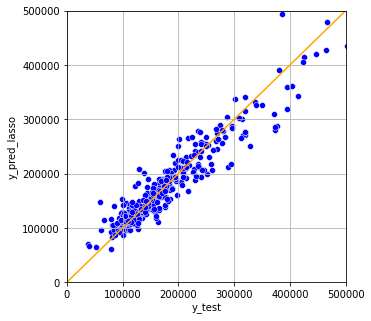

In [66]:
plt.figure(figsize=(5, 5))
sns.scatterplot(y_test[:, 0], y_pred, color = 'blue');
plt.plot([0, 500000], [0, 500000], color = 'orange')
plt.xlabel('y_test')
plt.ylabel('y_pred_lasso')
plt.xlim(0, 500000)
plt.ylim(0, 500000)
plt.grid()

In [67]:
score['catboost'] = RMSE
print (score)

Time['catboost'] = t1 - t0
print (Time)

{'LinearReg': 38541.164921882824, 'ridge': 30690.858152169647, 'lasso': 30679.238529528033, 'ElasticNet': 30679.238529528033, 'svr': 34980.82407050294, 'random_forest': 31001.733751127296, 'xgboost': 28735.103128052364, 'lightgbm': 30155.688052693637, 'catboost': 28548.060952896452}
{'LinearReg': 0.03800153732299805, 'ridge': 0.06300210952758789, 'lasso': 0.12499523162841797, 'ElasticNet': 1.063910961151123, 'svr': 4.51299786567688, 'random_forest': 39.26423239707947, 'xgboost': -0.12400245666503906, 'lightgbm': 2.153000831604004, 'catboost': 26.029237508773804}


### STEP6. Compare the models

In [68]:
df_score = pd.DataFrame(score.items())

In [69]:
df_score.columns = ['Method', 'RMSE']

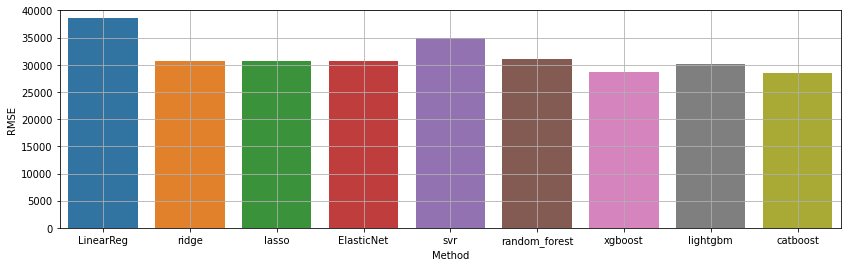

In [70]:
plt.figure(figsize=(14, 4))
sns.barplot(df_score.Method, df_score.RMSE)
plt.grid()
plt.ylim(0, 40000)
plt.show()

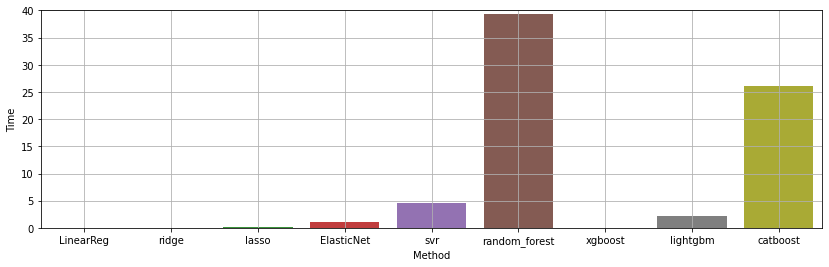

In [74]:
df_time = pd.DataFrame(Time.items())
df_time.columns = ['Method', 'Time']

plt.figure(figsize=(14, 4))
sns.barplot(df_time.Method, df_time.Time)
plt.grid()
plt.ylim(0, 40)
plt.show()

The above RMSE plot shows that Ridge, Lasso, Random Forest, XGBoost_dmatrix, and ElasticNet all have similar error.

Next I am going to use Lasso and xgboost_dmatrix method to run the prediction.

In [72]:
filename = 'lasso_model.sav'
pickle.dump(lr_cv, open(filename, 'wb'))

In [73]:
filename = 'catboost_model.sav'
pickle.dump(cb_cv, open(filename, 'wb'))

### Summary 

For this linear regression problem, I use several methods and compare the results. Based on the results, we can put them into 3 categories:

Good: Catboost performs the best among those regression algorithms. But it is the slowest.

Medium: Ridge, Lasso, ElasticNet, and tree-based methods of Random Forest, XGboost, XGboost_dmatrix, lightGBM. Especially Ridge, Lasso, ElasticNet, and XGboost run very fast.

Poor: Linear Regression and SVR

The indepedent and response variables are original values, and not transformed to log format.